In [1]:
# Cargar dependencias.
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

# Clustering.
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.preprocessing import OneHotEncoder

# Normalizar.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import silhouette_score

# Graficar en 3D.
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (12, 5)
plt.style.use('ggplot')


In [2]:
# Subir el dataset.
from google.colab import files
import io

uploaded = files.upload()
Base_de_datos = pd.read_csv(io.BytesIO(uploaded["CollegeScorecard.csv"]))

Saving CollegeScorecard.csv to CollegeScorecard.csv


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,9,1427,1542,1561,1575) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
bd2=Base_de_datos[Base_de_datos.CURROPER==1]

In [4]:
columns_name = bd2.columns.values
list(columns_name)

['UNITID',
 'OPEID',
 'opeid6',
 'INSTNM',
 'CITY',
 'STABBR',
 'ZIP',
 'AccredAgency',
 'INSTURL',
 'NPCURL',
 'sch_deg',
 'HCM2',
 'main',
 'NUMBRANCH',
 'PREDDEG',
 'HIGHDEG',
 'CONTROL',
 'st_fips',
 'region',
 'LOCALE',
 'locale2',
 'LATITUDE',
 'LONGITUDE',
 'CCBASIC',
 'CCUGPROF',
 'CCSIZSET',
 'HBCU',
 'PBI',
 'ANNHI',
 'TRIBAL',
 'AANAPII',
 'HSI',
 'NANTI',
 'MENONLY',
 'WOMENONLY',
 'RELAFFIL',
 'ADM_RATE',
 'ADM_RATE_ALL',
 'SATVR25',
 'SATVR75',
 'SATMT25',
 'SATMT75',
 'SATWR25',
 'SATWR75',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCM25',
 'ACTCM75',
 'ACTEN25',
 'ACTEN75',
 'ACTMT25',
 'ACTMT75',
 'ACTWR25',
 'ACTWR75',
 'ACTCMMID',
 'ACTENMID',
 'ACTMTMID',
 'ACTWRMID',
 'SAT_AVG',
 'SAT_AVG_ALL',
 'PCIP01',
 'PCIP03',
 'PCIP04',
 'PCIP05',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP12',
 'PCIP13',
 'PCIP14',
 'PCIP15',
 'PCIP16',
 'PCIP19',
 'PCIP22',
 'PCIP23',
 'PCIP24',
 'PCIP25',
 'PCIP26',
 'PCIP27',
 'PCIP29',
 'PCIP30',
 'PCIP31',
 'PCIP38',
 'PCIP39',
 'PCIP40',

In [7]:
bd3 = bd2[['INSTNM','PREDDEG','DISTANCEONLY','TUITFTE','ADM_RATE_ALL','NPT4_PUB','NPT4_PRIV']].copy()


In [8]:
bd3.head()

,INSTNM,PREDDEG,DISTANCEONLY,TUITFTE,ADM_RATE_ALL,NPT4_PUB,NPT4_PRIV
0,Alabama A & M University,3,0.0,9063.0,0.8989,13415.0,NaN
1,University of Alabama at Birmingham,3,0.0,9033.0,0.8673,14805.0,NaN
2,Amridge University,3,0.0,12057.0,NaN,NaN,7455.0
3,University of Alabama in Huntsville,3,0.0,8322.0,0.8062,17520.0,NaN
4,Alabama State University,3,0.0,7813.0,0.5125,11936.0,NaN


In [9]:
bd3["PREDDEG"].replace(0, " Non-degree-granting", inplace=True)
bd3["PREDDEG"].replace(1, " Certificate degree", inplace=True)
bd3["PREDDEG"].replace(2, " Associate degree", inplace=True)
bd3["PREDDEG"].replace(3, " Bachelor's degree", inplace=True)
bd3["PREDDEG"].replace(4, " Graduate degree", inplace=True)


In [10]:
bd3["ADM_RATE_ALL"].replace("", np.nan , inplace=True)

In [11]:
semilla_original=pd.get_dummies(bd3, columns=["PREDDEG"])

In [12]:
semilla_original

,INSTNM,DISTANCEONLY,TUITFTE,ADM_RATE_ALL,NPT4_PUB,NPT4_PRIV,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Graduate degree,PREDDEG_ Non-degree-granting
0,Alabama A & M University,0.0,9063.0,0.8989,13415.0,NaN,0,1,0,0,0
1,University of Alabama at Birmingham,0.0,9033.0,0.8673,14805.0,NaN,0,1,0,0,0
2,Amridge University,0.0,12057.0,NaN,NaN,7455.0,0,1,0,0,0
3,University of Alabama in Huntsville,0.0,8322.0,0.8062,17520.0,NaN,0,1,0,0,0
4,Alabama State University,0.0,7813.0,0.5125,11936.0,NaN,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7799,Georgia Military College-Columbus Campus,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
7800,Georgia Military College-Valdosta Campus,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
7801,Georgia Military College-Warner Robins Campus,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
7802,Georgia Military College-Online,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1


- Caso 1: NPT4_PUB, PREDDEG, DISTANCEONLY
- Caso 2: NPT4_PUB, PREDDEG, TUITFTE
- Caso 3: NPT4_PUB, PREDDEG, ADM_RATE_ALL
- Caso 4: NPT4_PUB, DISTANCEONLY, TUITFTE
- Caso 5: NPT4_PUB, DISTANCEONLY, ADM_RATE_ALL
- Caso 6: NPT4_PUB, TUITFTE, ADM_RATE_ALL

- Caso 7: NPT4_PRIV, PREDDEG, DISTANCEONLY
- Caso 8: NPT4_PRIV, PREDDEG, TUITFTE
- Caso 9: NPT4_PRIV, PREDDEG, ADM_RATE_ALL
- Caso 10: NPT4_PRIV, DISTANCEONLY, TUITFTE
- Caso 11: NPT4_PRIV, DISTANCEONLY, ADM_RATE_ALL
- Caso 12: NPT4_PRIV, TUITFTE, ADM_RATE_ALL

In [212]:
#Caso 1
semillas1_ndd=semilla_original.drop(columns=['NPT4_PRIV','TUITFTE','ADM_RATE_ALL'])
semillas_1_nd=semilla_original.drop(columns=['NPT4_PRIV','TUITFTE','ADM_RATE_ALL','INSTNM'])
semillas_1_d=semillas_1_nd.dropna()
semillas1_norm=(semillas_1_d-semillas_1_d.min())/(semillas_1_d.max()-semillas_1_d.min())

In [213]:
semillas1_norm

,DISTANCEONLY,NPT4_PUB,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Graduate degree,PREDDEG_ Non-degree-granting
0,0.0,0.522086,0.0,1.0,0.0,NaN,0.0
1,0.0,0.570279,0.0,1.0,0.0,NaN,0.0
3,0.0,0.664413,0.0,1.0,0.0,NaN,0.0
4,0.0,0.470806,0.0,1.0,0.0,NaN,0.0
5,0.0,0.782158,0.0,1.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...
7371,0.0,0.327959,1.0,0.0,0.0,NaN,0.0
7373,0.0,0.609528,1.0,0.0,0.0,NaN,0.0
7378,0.0,0.159074,0.0,0.0,1.0,NaN,0.0
7381,0.0,0.501560,0.0,1.0,0.0,NaN,0.0


In [214]:
semillas1_norm=semillas1_norm.drop(columns=['PREDDEG_ Graduate degree'])

In [215]:
# Dataset normalizado para correrlo en la curva de codo.
X1 = semillas1_norm

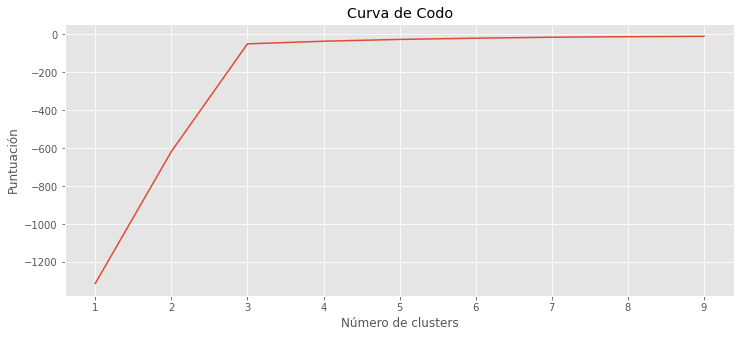

In [216]:
# Curva de Codo
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X1).score(X1) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de clusters')
plt.ylabel('Puntuación')
plt.title('Curva de Codo')
plt.show()

Se usara un k=3

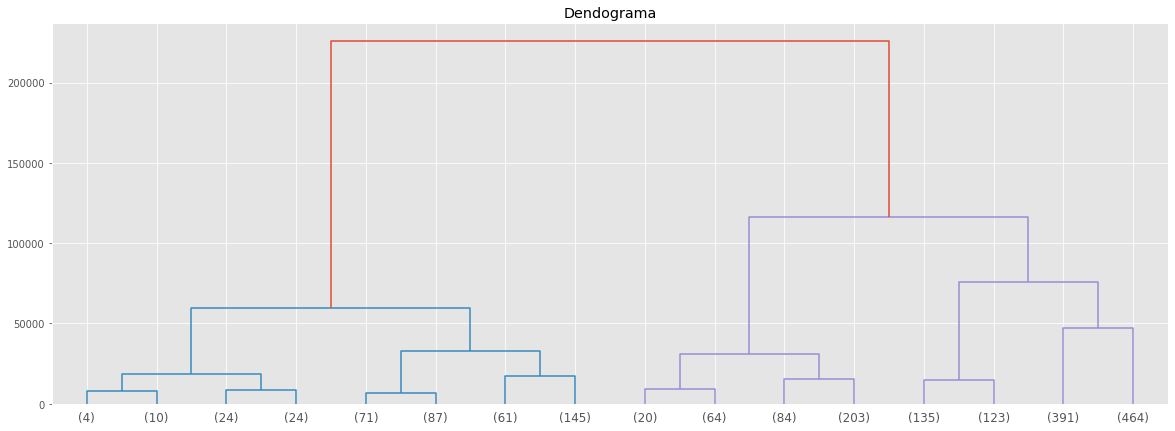

In [217]:
semillas1_dendro=semillas_1_d.drop(columns=['PREDDEG_ Graduate degree'])
plt.figure(figsize=(20,7))
plt.title('Dendograma')
dend=sch.dendrogram(sch.linkage(semillas1_dendro,method='ward'),truncate_mode='level',p=3)

In [218]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
ayuda=cluster.fit(semillas1_norm)
labels_2D=ayuda.labels_

In [219]:
semillas1_ndd1=semillas1_ndd.drop(columns=['PREDDEG_ Graduate degree'])
semillas1_ndd1=semillas1_ndd1.dropna()

In [220]:
model=AgglomerativeClustering(n_clusters=3, linkage='ward')

data_fit_3=model.fit(semillas1_norm)
lab_3c=data_fit_3.labels_


In [221]:
semillas1_ndd1

,INSTNM,DISTANCEONLY,NPT4_PUB,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting
0,Alabama A & M University,0.0,13415.0,0,1,0,0
1,University of Alabama at Birmingham,0.0,14805.0,0,1,0,0
3,University of Alabama in Huntsville,0.0,17520.0,0,1,0,0
4,Alabama State University,0.0,11936.0,0,1,0,0
5,The University of Alabama,0.0,20916.0,0,1,0,0
...,...,...,...,...,...,...,...
7371,South Georgia State College,0.0,7816.0,1,0,0,0
7373,Georgia Military College-Distance Learning Cam...,0.0,15937.0,1,0,0,0
7378,Central Georgia Technical College,0.0,2945.0,0,0,1,0
7381,Arizona State University-Skysong,0.0,12823.0,0,1,0,0


In [222]:

semillas1_ndd1['Labels_3Clusters']=lab_3c
semillas1_ndd1.describe()


,DISTANCEONLY,NPT4_PUB,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
count,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000
mean,0.000524,9578.900524,0.406806,0.292670,0.296859,0.003665,1.000524
std,0.022881,4596.354928,0.491367,0.455107,0.456993,0.060443,0.770392
min,0.000000,-1643.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6304.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,8773.500000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,12494.500000,1.000000,1.000000,1.000000,0.000000,2.000000
max,1.000000,27199.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [223]:
#Grupo 0
print("GRUPO 0:")
is_G=semillas1_ndd1.loc[:, 'Labels_3Clusters']==0
C3_G=semillas1_ndd1[is_G]
df_01 = pd.DataFrame(C3_G)
df_01



GRUPO 0:


,INSTNM,DISTANCEONLY,NPT4_PUB,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
0,Alabama A & M University,0.0,13415.0,0,1,0,0,0
1,University of Alabama at Birmingham,0.0,14805.0,0,1,0,0,0
3,University of Alabama in Huntsville,0.0,17520.0,0,1,0,0,0
4,Alabama State University,0.0,11936.0,0,1,0,0,0
5,The University of Alabama,0.0,20916.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
7255,Ukiah Adult School,0.0,12777.0,0,0,0,1,0
7322,Georgia Regents University,0.0,2898.0,0,1,0,0,0
7323,Middle Georgia State College,0.0,9049.0,0,1,0,0,0
7370,University of North Georgia,0.0,14534.0,0,1,0,0,0


In [229]:
df_01.describe()

,DISTANCEONLY,NPT4_PUB,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
count,566.000000,566.000000,566.0,566.000000,566.0,566.000000,566.0
mean,0.001767,13315.851590,0.0,0.987633,0.0,0.012367,0.0
std,0.042033,3958.619635,0.0,0.110617,0.0,0.110617,0.0
min,0.000000,2035.000000,0.0,0.000000,0.0,0.000000,0.0
25%,0.000000,10780.250000,0.0,1.000000,0.0,0.000000,0.0
50%,0.000000,13529.500000,0.0,1.000000,0.0,0.000000,0.0
75%,0.000000,15883.500000,0.0,1.000000,0.0,0.000000,0.0
max,1.000000,27032.000000,0.0,1.000000,0.0,1.000000,0.0


In [224]:
#Grupo 1
print("GRUPO 1:")
is_G=semillas1_ndd1.loc[:, 'Labels_3Clusters']==1
C3_G=semillas1_ndd1[is_G]
df_11 = pd.DataFrame(C3_G)
df_11

GRUPO 1:


,INSTNM,DISTANCEONLY,NPT4_PUB,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
6,Central Alabama Community College,0.0,6407.0,1,0,0,0,1
11,Chattahoochee Valley Community College,0.0,1873.0,1,0,0,0,1
14,Enterprise State Community College,0.0,5048.0,1,0,0,0,1
15,James H Faulkner State Community College,0.0,7404.0,1,0,0,0,1
17,Gadsden State Community College,0.0,4565.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...
6763,Moreno Valley College,0.0,6430.0,1,0,0,0,1
6766,Norco College,0.0,7258.0,1,0,0,0,1
6835,Keweenaw Bay Ojibwa Community College,0.0,6998.0,1,0,0,0,1
7371,South Georgia State College,0.0,7816.0,1,0,0,0,1


In [230]:
df_11.describe()

,DISTANCEONLY,NPT4_PUB,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
count,777.0,777.000000,777.0,777.0,777.0,777.0,777.0
mean,0.0,7536.906049,1.0,0.0,0.0,0.0,1.0
std,0.0,3074.816746,0.0,0.0,0.0,0.0,0.0
min,0.0,-445.000000,1.0,0.0,0.0,0.0,1.0
25%,0.0,5476.000000,1.0,0.0,0.0,0.0,1.0
50%,0.0,7258.000000,1.0,0.0,0.0,0.0,1.0
75%,0.0,9140.000000,1.0,0.0,0.0,0.0,1.0
max,0.0,22774.000000,1.0,0.0,0.0,0.0,1.0


In [226]:
#Grupo 2
print("GRUPO 2:")
is_G=semillas1_ndd1.loc[:, 'Labels_3Clusters']==2
C3_G=semillas1_ndd1[is_G]
df_21 = pd.DataFrame(C3_G)
df_21

GRUPO 2:


,INSTNM,DISTANCEONLY,NPT4_PUB,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
25,J F Drake State Community and Technical College,0.0,7163.0,0,0,1,0,2
31,Lawson State Community College-Birmingham Campus,0.0,7406.0,0,0,1,0,2
33,Lurleen B Wallace Community College,0.0,8041.0,0,0,1,0,2
44,Reid State Technical College,0.0,4912.0,0,0,1,0,2
55,H Councill Trenholm State Technical College,0.0,6067.0,0,0,1,0,2
...,...,...,...,...,...,...,...,...
6828,Flagler Technical Institute,0.0,10270.0,0,0,1,0,2
6834,D A Dorsey Educational Center,0.0,7404.0,0,0,1,0,2
7242,Carthage R9 School District-Carthage Technical...,0.0,10875.0,0,0,1,0,2
7378,Central Georgia Technical College,0.0,2945.0,0,0,1,0,2


In [231]:
df_21.describe()

,DISTANCEONLY,NPT4_PUB,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
count,567.0,567.000000,567.0,567.0,567.0,567.0,567.0
mean,0.0,8646.828924,0.0,0.0,1.0,0.0,2.0
std,0.0,4700.063113,0.0,0.0,0.0,0.0,0.0
min,0.0,-1643.000000,0.0,0.0,1.0,0.0,2.0
25%,0.0,5647.500000,0.0,0.0,1.0,0.0,2.0
50%,0.0,7834.000000,0.0,0.0,1.0,0.0,2.0
75%,0.0,10688.000000,0.0,0.0,1.0,0.0,2.0
max,0.0,27199.000000,0.0,0.0,1.0,0.0,2.0


Caso 2: NPT4_PUB, PREDDEG, TUITFTE


In [232]:
#Caso 2
semillas2_ndd=semilla_original.drop(columns=['NPT4_PRIV','DISTANCEONLY','ADM_RATE_ALL'])
semillas_2_nd=semilla_original.drop(columns=['NPT4_PRIV','DISTANCEONLY','ADM_RATE_ALL','INSTNM'])
semillas_2_d=semillas_2_nd.dropna()
semillas2_norm=(semillas_2_d-semillas_2_d.min())/(semillas_2_d.max()-semillas_2_d.min())

In [233]:
semillas2_norm

,TUITFTE,NPT4_PUB,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Graduate degree,PREDDEG_ Non-degree-granting
0,0.122073,0.522086,0.0,1.0,0.0,NaN,0.0
1,0.121669,0.570279,0.0,1.0,0.0,NaN,0.0
3,0.112090,0.664413,0.0,1.0,0.0,NaN,0.0
4,0.105233,0.470806,0.0,1.0,0.0,NaN,0.0
5,0.164309,0.782158,0.0,1.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...
7371,0.015817,0.327959,1.0,0.0,0.0,NaN,0.0
7373,0.039326,0.609528,1.0,0.0,0.0,NaN,0.0
7378,0.011950,0.159074,0.0,0.0,1.0,NaN,0.0
7381,0.158907,0.501560,0.0,1.0,0.0,NaN,0.0


In [234]:
semillas2_norm=semillas2_norm.drop(columns=['PREDDEG_ Graduate degree'])

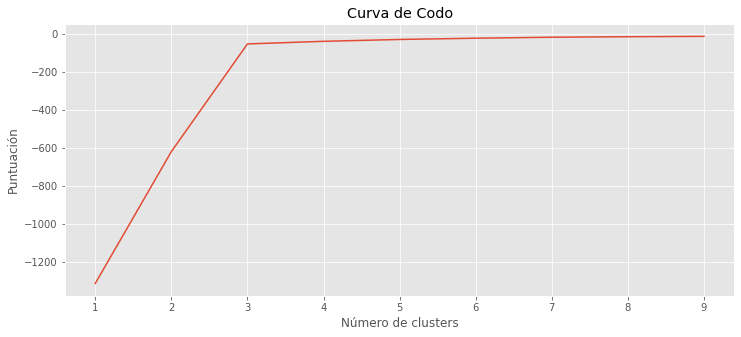

In [235]:
# Dataset normalizado para correrlo en la curva de codo.
X2 = semillas2_norm
# Curva de Codo
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X2).score(X2) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de clusters')
plt.ylabel('Puntuación')
plt.title('Curva de Codo')
plt.show()

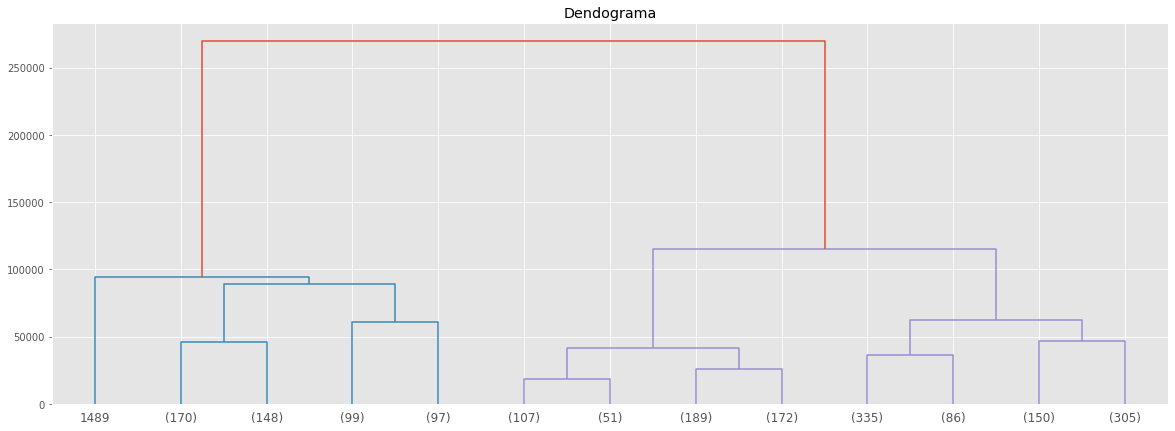

In [236]:
semillas2_dendro=semillas_2_d.drop(columns=['PREDDEG_ Graduate degree'])
plt.figure(figsize=(20,7))
plt.title('Dendograma')
dend=sch.dendrogram(sch.linkage(semillas2_dendro,method='ward'),truncate_mode='level',p=3)

In [237]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
ayuda=cluster.fit(semillas2_norm)
labels_2D=ayuda.labels_

In [238]:
semillas2_ndd2=semillas2_ndd.drop(columns=['PREDDEG_ Graduate degree'])
semillas2_ndd2=semillas2_ndd2.dropna()

In [239]:
model=AgglomerativeClustering(n_clusters=3, linkage='ward')

data_fit_3=model.fit(semillas2_norm)
lab_3c=data_fit_3.labels_


In [240]:

semillas2_ndd2['Labels_3Clusters']=lab_3c
semillas2_ndd2.describe()


,TUITFTE,NPT4_PUB,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
count,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000
mean,3982.818325,9578.900524,0.406806,0.292670,0.296859,0.003665,1.000524
std,3698.998963,4596.354928,0.491367,0.455107,0.456993,0.060443,0.770392
min,2.000000,-1643.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1524.000000,6304.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2928.000000,8773.500000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5494.000000,12494.500000,1.000000,1.000000,1.000000,0.000000,2.000000
max,74228.000000,27199.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [241]:
#Grupo 0
print("GRUPO 0:")
is_G=semillas2_ndd2.loc[:, 'Labels_3Clusters']==0
C3_G=semillas2_ndd2[is_G]
df_02 = pd.DataFrame(C3_G)
df_02


GRUPO 0:


,INSTNM,TUITFTE,NPT4_PUB,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
0,Alabama A & M University,9063.0,13415.0,0,1,0,0,0
1,University of Alabama at Birmingham,9033.0,14805.0,0,1,0,0,0
3,University of Alabama in Huntsville,8322.0,17520.0,0,1,0,0,0
4,Alabama State University,7813.0,11936.0,0,1,0,0,0
5,The University of Alabama,12198.0,20916.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
7255,Ukiah Adult School,1953.0,12777.0,0,0,0,1,0
7322,Georgia Regents University,8867.0,2898.0,0,1,0,0,0
7323,Middle Georgia State College,2744.0,9049.0,0,1,0,0,0
7370,University of North Georgia,4149.0,14534.0,0,1,0,0,0


In [242]:
#Grupo 1
print("GRUPO 1:")
is_G=semillas2_ndd2.loc[:, 'Labels_3Clusters']==1
C3_G=semillas2_ndd2[is_G]
df_12 = pd.DataFrame(C3_G)
df_12

GRUPO 1:


,INSTNM,TUITFTE,NPT4_PUB,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
6,Central Alabama Community College,2371.0,6407.0,1,0,0,0,1
11,Chattahoochee Valley Community College,2056.0,1873.0,1,0,0,0,1
14,Enterprise State Community College,2129.0,5048.0,1,0,0,0,1
15,James H Faulkner State Community College,2187.0,7404.0,1,0,0,0,1
17,Gadsden State Community College,1643.0,4565.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...
6763,Moreno Valley College,755.0,6430.0,1,0,0,0,1
6766,Norco College,721.0,7258.0,1,0,0,0,1
6835,Keweenaw Bay Ojibwa Community College,3303.0,6998.0,1,0,0,0,1
7371,South Georgia State College,1176.0,7816.0,1,0,0,0,1


In [243]:
#Grupo 2
print("GRUPO 2:")
is_G=semillas2_ndd2.loc[:, 'Labels_3Clusters']==2
C3_G=semillas2_ndd2[is_G]
df_22 = pd.DataFrame(C3_G)
df_22

GRUPO 2:


,INSTNM,TUITFTE,NPT4_PUB,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
25,J F Drake State Community and Technical College,1348.0,7163.0,0,0,1,0,2
31,Lawson State Community College-Birmingham Campus,1576.0,7406.0,0,0,1,0,2
33,Lurleen B Wallace Community College,1757.0,8041.0,0,0,1,0,2
44,Reid State Technical College,1331.0,4912.0,0,0,1,0,2
55,H Councill Trenholm State Technical College,2371.0,6067.0,0,0,1,0,2
...,...,...,...,...,...,...,...,...
6828,Flagler Technical Institute,2353.0,10270.0,0,0,1,0,2
6834,D A Dorsey Educational Center,3050.0,7404.0,0,0,1,0,2
7242,Carthage R9 School District-Carthage Technical...,3295.0,10875.0,0,0,1,0,2
7378,Central Georgia Technical College,889.0,2945.0,0,0,1,0,2


Caso 3: NPT4_PUB, PREDDEG, ADM_RATE_ALL


In [244]:
#Caso 3
semillas3_ndd=semilla_original.drop(columns=['NPT4_PRIV','DISTANCEONLY','TUITFTE'])
semillas_3_nd=semilla_original.drop(columns=['NPT4_PRIV','DISTANCEONLY','TUITFTE','INSTNM'])
semillas_3_d=semillas_3_nd.dropna()
semillas3_norm=(semillas_3_d-semillas_3_d.min())/(semillas_3_d.max()-semillas_3_d.min())

In [245]:
semillas3_norm

,ADM_RATE_ALL,NPT4_PUB,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Graduate degree,PREDDEG_ Non-degree-granting
0,0.882932,0.504422,0.0,1.0,0.0,NaN,0.0
1,0.846341,0.555010,0.0,1.0,0.0,NaN,0.0
3,0.775591,0.653820,0.0,1.0,0.0,NaN,0.0
4,0.435503,0.450595,0.0,1.0,0.0,NaN,0.0
5,0.496874,0.777414,0.0,1.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...
7255,0.548634,0.481202,0.0,0.0,0.0,NaN,1.0
7322,0.317161,0.121665,0.0,1.0,0.0,NaN,0.0
7323,0.361510,0.345525,0.0,1.0,0.0,NaN,0.0
7370,0.548634,0.545147,0.0,1.0,0.0,NaN,0.0


In [246]:
semillas3_norm=semillas3_norm.drop(columns=['PREDDEG_ Graduate degree'])


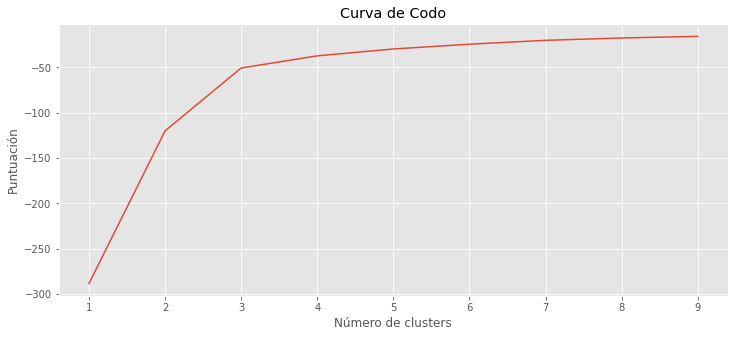

In [247]:
# Dataset normalizado para correrlo en la curva de codo.
X3 = semillas3_norm
# Curva de Codo
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X3).score(X3) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de clusters')
plt.ylabel('Puntuación')
plt.title('Curva de Codo')
plt.show()

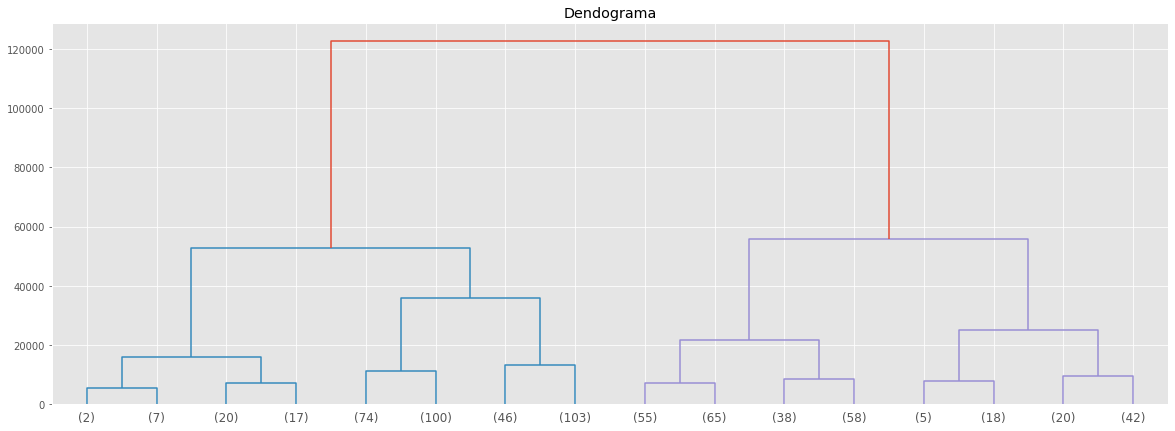

In [248]:
semillas3_dendro=semillas_3_d.drop(columns=['PREDDEG_ Graduate degree'])
plt.figure(figsize=(20,7))
plt.title('Dendograma')
dend=sch.dendrogram(sch.linkage(semillas3_dendro,method='ward'),truncate_mode='level',p=3)


In [249]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
ayuda=cluster.fit(semillas3_norm)
labels_2D=ayuda.labels_

In [250]:
semillas3_ndd3=semillas3_ndd.drop(columns=['PREDDEG_ Graduate degree'])
semillas3_ndd3=semillas3_ndd3.dropna()


In [251]:
model=AgglomerativeClustering(n_clusters=3, linkage='ward')

data_fit_3=model.fit(semillas3_norm)
lab_3c=data_fit_3.labels_


In [252]:
semillas3_ndd3['Labels_3Clusters']=lab_3c
semillas3_ndd3.describe()


,ADM_RATE_ALL,NPT4_PUB,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
count,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000
mean,0.676840,13001.528358,0.107463,0.783582,0.102985,0.005970,0.323881
std,0.177501,4275.718912,0.309932,0.412110,0.304166,0.077093,0.659209
min,0.136400,-445.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.565250,10339.250000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.680050,13259.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.819875,15861.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,27032.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [253]:
#Grupo 0
print("GRUPO 0:")
is_G=semillas3_ndd3.loc[:, 'Labels_3Clusters']==0
C3_G=semillas3_ndd3[is_G]
df_03 = pd.DataFrame(C3_G)
df_03


GRUPO 0:


,INSTNM,ADM_RATE_ALL,NPT4_PUB,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
0,Alabama A & M University,0.8989,13415.0,0,1,0,0,0
1,University of Alabama at Birmingham,0.8673,14805.0,0,1,0,0,0
3,University of Alabama in Huntsville,0.8062,17520.0,0,1,0,0,0
4,Alabama State University,0.5125,11936.0,0,1,0,0,0
5,The University of Alabama,0.5655,20916.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
7185,Pennsylvania State University-World Campus,0.6488,18165.0,0,1,0,0,0
7322,Georgia Regents University,0.4103,2898.0,0,1,0,0,0
7323,Middle Georgia State College,0.4486,9049.0,0,1,0,0,0
7370,University of North Georgia,0.6102,14534.0,0,1,0,0,0


In [256]:
df_03.describe()

,ADM_RATE_ALL,NPT4_PUB,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
count,525.000000,525.000000,525.0,525.0,525.0,525.0,525.0
mean,0.669972,13487.369524,0.0,1.0,0.0,0.0,0.0
std,0.169618,3944.482321,0.0,0.0,0.0,0.0,0.0
min,0.180000,2035.000000,0.0,1.0,0.0,0.0,0.0
25%,0.565500,11053.000000,0.0,1.0,0.0,0.0,0.0
50%,0.670000,13723.000000,0.0,1.0,0.0,0.0,0.0
75%,0.804100,16078.000000,0.0,1.0,0.0,0.0,0.0
max,1.000000,27032.000000,0.0,1.0,0.0,0.0,0.0


In [254]:
#Grupo 1
print("GRUPO 1:")
is_G=semillas3_ndd3.loc[:, 'Labels_3Clusters']==1
C3_G=semillas3_ndd3[is_G]
df_13 = pd.DataFrame(C3_G)
df_13


GRUPO 1:


,INSTNM,ADM_RATE_ALL,NPT4_PUB,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
1385,Washburn Institute of Technology,0.7923,12285.0,0,0,1,0,1
1649,Assabet Valley Regional Technical School,0.5098,15976.0,0,0,1,0,1
1681,Diman Regional Technical Institute,0.3433,13641.0,0,0,1,0,1
1764,Southeastern Technical Institute,0.6604,8688.0,0,0,1,0,1
2041,Grand River Technical School,1.0000,698.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
5545,Vinal Technical High School,1.0000,17265.0,0,0,0,1,1
5562,Orleans Niagara BOCES-Practical Nursing Program,1.0000,12224.0,0,0,1,0,1
6268,Escuela De Troqueleria Y Herramentaje,0.8605,328.0,0,0,1,0,1
7242,Carthage R9 School District-Carthage Technical...,0.7143,10875.0,0,0,1,0,1


In [257]:
df_13.describe()

,ADM_RATE_ALL,NPT4_PUB,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
count,73.000000,73.000000,73.0,73.0,73.000000,73.000000,73.0
mean,0.689042,12800.465753,0.0,0.0,0.945205,0.054795,1.0
std,0.243189,5043.152946,0.0,0.0,0.229154,0.229154,0.0
min,0.136400,328.000000,0.0,0.0,0.000000,0.000000,1.0
25%,0.500000,10311.000000,0.0,0.0,1.000000,0.000000,1.0
50%,0.714300,12816.000000,0.0,0.0,1.000000,0.000000,1.0
75%,0.922400,16072.000000,0.0,0.0,1.000000,0.000000,1.0
max,1.000000,23325.000000,0.0,0.0,1.000000,1.000000,1.0


In [255]:
#Grupo 2
print("GRUPO 2:")
is_G=semillas3_ndd3.loc[:, 'Labels_3Clusters']==2
C3_G=semillas3_ndd3[is_G]
df_23 = pd.DataFrame(C3_G)
df_23

GRUPO 2:


,INSTNM,ADM_RATE_ALL,NPT4_PUB,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
34,Marion Military Institute,0.6034,11013.0,1,0,0,0,2
181,University of Arkansas Community College-Morri...,0.5838,6770.0,1,0,0,0,2
875,Abraham Baldwin Agricultural College,0.7090,9477.0,1,0,0,0,2
901,College of Coastal Georgia,0.8221,11144.0,1,0,0,0,2
926,Gordon State College,0.4529,8798.0,1,0,0,0,2
...,...,...,...,...,...,...,...,...
4269,Instituto Tecnologico de Puerto Rico-Recinto d...,0.8605,3323.0,1,0,0,0,2
4270,Instituto Tecnologico de Puerto Rico-Recinto d...,0.8605,-445.0,1,0,0,0,2
4296,University of Puerto Rico-Utuado,0.4908,8016.0,1,0,0,0,2
4324,Georgia Perimeter College,0.5118,6558.0,1,0,0,0,2


In [258]:
df_23.describe()

,ADM_RATE_ALL,NPT4_PUB,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
count,72.000000,72.000000,72.0,72.0,72.0,72.0,72.0
mean,0.714544,9662.791667,1.0,0.0,0.0,0.0,2.0
std,0.150405,4306.803922,0.0,0.0,0.0,0.0,0.0
min,0.381800,-445.000000,1.0,0.0,0.0,0.0,2.0
25%,0.600000,6663.750000,1.0,0.0,0.0,0.0,2.0
50%,0.729500,9851.500000,1.0,0.0,0.0,0.0,2.0
75%,0.830200,11918.250000,1.0,0.0,0.0,0.0,2.0
max,1.000000,20426.000000,1.0,0.0,0.0,0.0,2.0


Caso 4: NPT4_PUB, DISTANCEONLY, TUITFTE

In [259]:
semillas4_ndd=semilla_original.drop(columns=['NPT4_PRIV','PREDDEG_ Associate degree',"PREDDEG_ Bachelor's degree",'PREDDEG_ Certificate degree','PREDDEG_ Non-degree-granting','PREDDEG_ Graduate degree','ADM_RATE_ALL'])
semillas_4_nd=semilla_original.drop(columns=['NPT4_PRIV','PREDDEG_ Associate degree',"PREDDEG_ Bachelor's degree",'PREDDEG_ Certificate degree','PREDDEG_ Non-degree-granting','PREDDEG_ Graduate degree','ADM_RATE_ALL','INSTNM'])
semillas_4_d=semillas_4_nd.dropna()
semillas4_norm=(semillas_4_d-semillas_4_d.min())/(semillas_4_d.max()-semillas_4_d.min())

In [260]:
semillas4_norm

,DISTANCEONLY,TUITFTE,NPT4_PUB
0,0.0,0.122073,0.522086
1,0.0,0.121669,0.570279
3,0.0,0.112090,0.664413
4,0.0,0.105233,0.470806
5,0.0,0.164309,0.782158
...,...,...,...
7371,0.0,0.015817,0.327959
7373,0.0,0.039326,0.609528
7378,0.0,0.011950,0.159074
7381,0.0,0.158907,0.501560


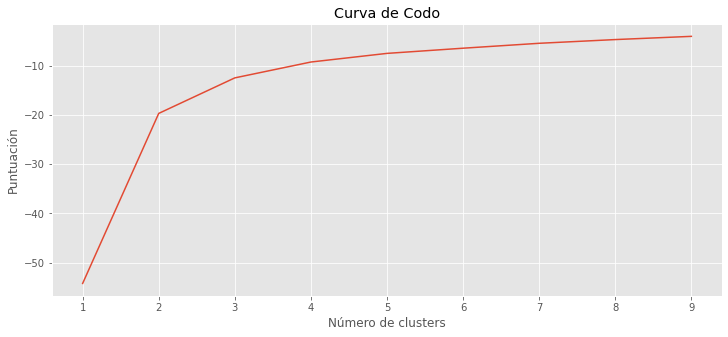

In [261]:
# Dataset normalizado para correrlo en la curva de codo.
X4 = semillas4_norm
# Curva de Codo
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X4).score(X4) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de clusters')
plt.ylabel('Puntuación')
plt.title('Curva de Codo')
plt.show()

K=2

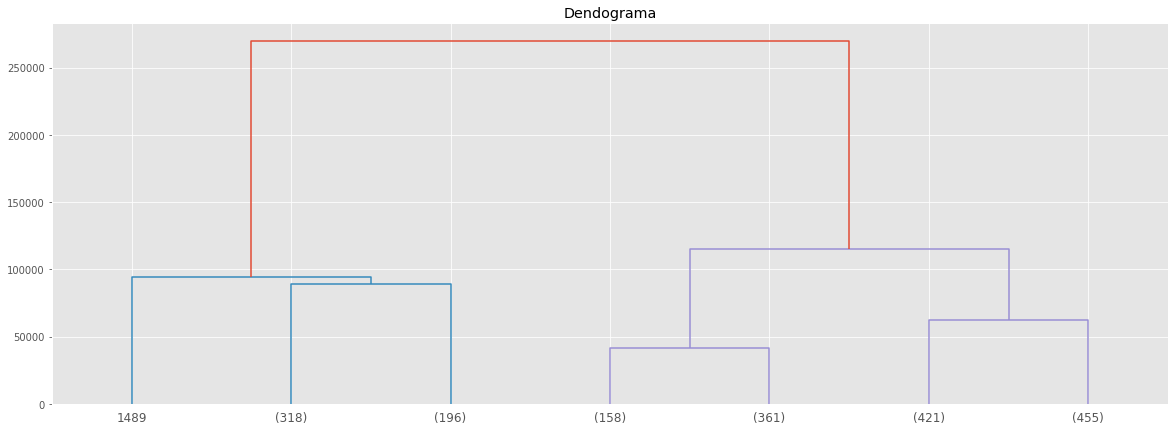

In [262]:
semillas4_dendro=semillas_4_d
plt.figure(figsize=(20,7))
plt.title('Dendograma')
dend=sch.dendrogram(sch.linkage(semillas4_dendro,method='ward'),truncate_mode='level',p=2)



In [263]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
ayuda=cluster.fit(semillas4_norm)
labels_2D=ayuda.labels_

In [264]:
semillas4_ndd4=semillas4_ndd
semillas4_ndd4=semillas4_ndd4.dropna()


In [265]:
model=AgglomerativeClustering(n_clusters=2, linkage='ward')

data_fit_3=model.fit(semillas4_norm)
lab_3c=data_fit_3.labels_

In [266]:
semillas4_ndd4['Labels_3Clusters']=lab_3c
semillas4_ndd4.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DISTANCEONLY,TUITFTE,NPT4_PUB,Labels_3Clusters
count,1910.000000,1910.000000,1910.000000,1910.000000
mean,0.000524,3982.818325,9578.900524,0.231414
std,0.022881,3698.998963,4596.354928,0.421847
min,0.000000,2.000000,-1643.000000,0.000000
25%,0.000000,1524.000000,6304.750000,0.000000
50%,0.000000,2928.000000,8773.500000,0.000000
75%,0.000000,5494.000000,12494.500000,0.000000
max,1.000000,74228.000000,27199.000000,1.000000


In [268]:
#Grupo 0
print("GRUPO 0:")
is_G=semillas4_ndd4.loc[:, 'Labels_3Clusters']==0
C3_G=semillas4_ndd4[is_G]
df_04 = pd.DataFrame(C3_G)
df_04

GRUPO 0:


,INSTNM,DISTANCEONLY,TUITFTE,NPT4_PUB,Labels_3Clusters
0,Alabama A & M University,0.0,9063.0,13415.0,0
4,Alabama State University,0.0,7813.0,11936.0,0
6,Central Alabama Community College,0.0,2371.0,6407.0,0
8,Auburn University at Montgomery,0.0,7625.0,11915.0,0
11,Chattahoochee Valley Community College,0.0,2056.0,1873.0,0
...,...,...,...,...,...
7322,Georgia Regents University,0.0,8867.0,2898.0,0
7323,Middle Georgia State College,0.0,2744.0,9049.0,0
7371,South Georgia State College,0.0,1176.0,7816.0,0
7378,Central Georgia Technical College,0.0,889.0,2945.0,0


In [269]:
df_04.describe()

,DISTANCEONLY,TUITFTE,NPT4_PUB,Labels_3Clusters
count,1468.0,1468.000000,1468.000000,1468.0
mean,0.0,2921.624659,7564.170300,0.0
std,0.0,2275.788205,2807.572646,0.0
min,0.0,2.000000,-1643.000000,0.0
25%,0.0,1308.500000,5653.750000,0.0
50%,0.0,2370.000000,7565.500000,0.0
75%,0.0,3745.000000,9606.250000,0.0
max,0.0,17091.000000,13415.000000,0.0


In [270]:
#Grupo 1
print("GRUPO 1:")
is_G=semillas4_ndd4.loc[:, 'Labels_3Clusters']==1
C3_G=semillas4_ndd4[is_G]
df_14 = pd.DataFrame(C3_G)
df_14

GRUPO 1:


,INSTNM,DISTANCEONLY,TUITFTE,NPT4_PUB,Labels_3Clusters
1,University of Alabama at Birmingham,0.0,9033.0,14805.0,1
3,University of Alabama in Huntsville,0.0,8322.0,17520.0,1
5,The University of Alabama,0.0,12198.0,20916.0,1
9,Auburn University,0.0,13186.0,17541.0,1
26,Jacksonville State University,0.0,6192.0,16078.0,1
...,...,...,...,...,...
6548,Southern Worcester County Regional Voc School ...,0.0,9738.0,21622.0,1
7185,Pennsylvania State University-World Campus,1.0,6355.0,18165.0,1
7370,University of North Georgia,0.0,4149.0,14534.0,1
7373,Georgia Military College-Distance Learning Cam...,0.0,2921.0,15937.0,1


In [271]:
df_14.describe()

,DISTANCEONLY,TUITFTE,NPT4_PUB,Labels_3Clusters
count,442.000000,442.000000,442.000000,442.0
mean,0.002262,7507.325792,16270.357466,1.0
std,0.047565,5079.506955,2615.688293,0.0
min,0.000000,9.000000,12685.000000,1.0
25%,0.000000,4893.750000,14336.000000,1.0
50%,0.000000,6773.500000,15735.000000,1.0
75%,0.000000,9536.500000,17429.750000,1.0
max,1.000000,74228.000000,27199.000000,1.0


Caso 5: NPT4_PUB, DISTANCEONLY, ADM_RATE_ALL

In [272]:
semillas5_ndd=semilla_original.drop(columns=['NPT4_PRIV','PREDDEG_ Associate degree',"PREDDEG_ Bachelor's degree",'PREDDEG_ Certificate degree','PREDDEG_ Non-degree-granting','PREDDEG_ Graduate degree','TUITFTE'])
semillas_5_nd=semilla_original.drop(columns=['NPT4_PRIV','PREDDEG_ Associate degree',"PREDDEG_ Bachelor's degree",'PREDDEG_ Certificate degree','PREDDEG_ Non-degree-granting','PREDDEG_ Graduate degree','TUITFTE','INSTNM'])
semillas_5_d=semillas_5_nd.dropna()
semillas5_norm=(semillas_5_d-semillas_5_d.min())/(semillas_5_d.max()-semillas_5_d.min())

In [273]:
semillas5_norm

,DISTANCEONLY,ADM_RATE_ALL,NPT4_PUB
0,0.0,0.882932,0.504422
1,0.0,0.846341,0.555010
3,0.0,0.775591,0.653820
4,0.0,0.435503,0.450595
5,0.0,0.496874,0.777414
...,...,...,...
7255,0.0,0.548634,0.481202
7322,0.0,0.317161,0.121665
7323,0.0,0.361510,0.345525
7370,0.0,0.548634,0.545147


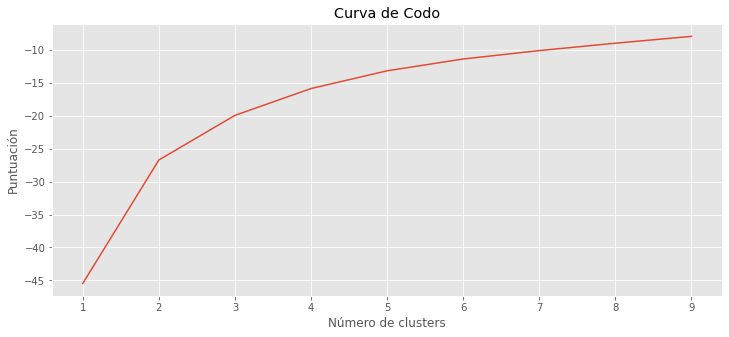

In [274]:
# Dataset normalizado para correrlo en la curva de codo.
X5 = semillas5_norm
# Curva de Codo
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X5).score(X5) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de clusters')
plt.ylabel('Puntuación')
plt.title('Curva de Codo')
plt.show()

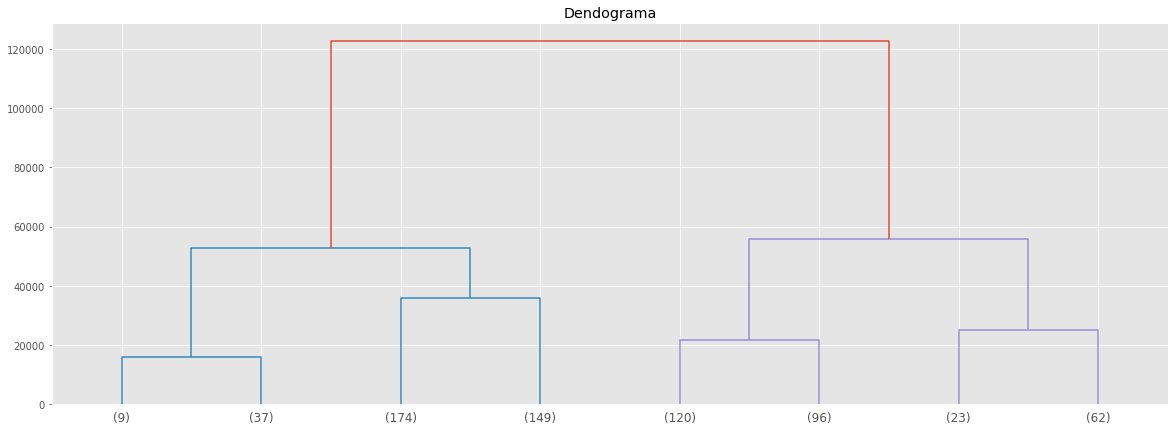

In [275]:
semillas5_dendro=semillas_5_d
plt.figure(figsize=(20,7))
plt.title('Dendograma')
dend=sch.dendrogram(sch.linkage(semillas5_dendro,method='ward'),truncate_mode='level',p=2)

In [276]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
ayuda=cluster.fit(semillas5_norm)
labels_2D=ayuda.labels_

In [277]:
semillas5_ndd5=semillas5_ndd
semillas5_ndd5=semillas5_ndd5.dropna()

In [278]:
model=AgglomerativeClustering(n_clusters=2, linkage='ward')

data_fit_3=model.fit(semillas5_norm)
lab_3c=data_fit_3.labels_

In [279]:
semillas5_ndd5['Labels_3Clusters']=lab_3c
semillas5_ndd5.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DISTANCEONLY,ADM_RATE_ALL,NPT4_PUB,Labels_3Clusters
count,670.000000,670.000000,670.000000,670.000000
mean,0.001493,0.676840,13001.528358,0.438806
std,0.038633,0.177501,4275.718912,0.496612
min,0.000000,0.136400,-445.000000,0.000000
25%,0.000000,0.565250,10339.250000,0.000000
50%,0.000000,0.680050,13259.000000,0.000000
75%,0.000000,0.819875,15861.000000,1.000000
max,1.000000,1.000000,27032.000000,1.000000


In [280]:
#Grupo 0
print("GRUPO 0:")
is_G=semillas5_ndd5.loc[:, 'Labels_3Clusters']==0
C3_G=semillas5_ndd5[is_G]
df_05 = pd.DataFrame(C3_G)
df_05

GRUPO 0:


,INSTNM,DISTANCEONLY,ADM_RATE_ALL,NPT4_PUB,Labels_3Clusters
4,Alabama State University,0.0,0.5125,11936.0,0
5,The University of Alabama,0.0,0.5655,20916.0,0
34,Marion Military Institute,0.0,0.6034,11013.0,0
133,University of Arkansas at Little Rock,0.0,0.5274,10087.0,0
142,University of Arkansas,0.0,0.5858,11861.0,0
...,...,...,...,...,...
7185,Pennsylvania State University-World Campus,1.0,0.6488,18165.0,0
7255,Ukiah Adult School,0.0,0.6102,12777.0,0
7322,Georgia Regents University,0.0,0.4103,2898.0,0
7323,Middle Georgia State College,0.0,0.4486,9049.0,0


In [282]:
df_05.describe()

,DISTANCEONLY,ADM_RATE_ALL,NPT4_PUB,Labels_3Clusters
count,376.000000,376.000000,376.000000,376.0
mean,0.002660,0.552161,13486.579787,0.0
std,0.051571,0.122500,4486.545245,0.0
min,0.000000,0.136400,1887.000000,0.0
25%,0.000000,0.474975,10561.250000,0.0
50%,0.000000,0.579600,13863.500000,0.0
75%,0.000000,0.647150,16390.000000,0.0
max,1.000000,0.774800,27032.000000,0.0


In [281]:
#Grupo 1
print("GRUPO 1:")
is_G=semillas5_ndd5.loc[:, 'Labels_3Clusters']==1
C3_G=semillas5_ndd5[is_G]
df_15 = pd.DataFrame(C3_G)
df_15

GRUPO 1:


,INSTNM,DISTANCEONLY,ADM_RATE_ALL,NPT4_PUB,Labels_3Clusters
0,Alabama A & M University,0.0,0.8989,13415.0,1
1,University of Alabama at Birmingham,0.0,0.8673,14805.0,1
3,University of Alabama in Huntsville,0.0,0.8062,17520.0,1
8,Auburn University at Montgomery,0.0,0.8371,11915.0,1
9,Auburn University,0.0,0.8274,17541.0,1
...,...,...,...,...,...
5779,University of California-Merced,0.0,0.7551,11921.0,1
6031,Arizona State University-Downtown Phoenix,0.0,0.7626,12403.0,1
6268,Escuela De Troqueleria Y Herramentaje,0.0,0.8605,328.0,1
7242,Carthage R9 School District-Carthage Technical...,0.0,0.7143,10875.0,1


In [283]:
df_15.describe()

,DISTANCEONLY,ADM_RATE_ALL,NPT4_PUB,Labels_3Clusters
count,294.0,294.000000,294.000000,294.0
mean,0.0,0.836293,12381.190476,1.0
std,0.0,0.085279,3910.473097,0.0
min,0.0,0.681800,-445.000000,1.0
25%,0.0,0.768050,10279.250000,1.0
50%,0.0,0.830200,12688.500000,1.0
75%,0.0,0.891550,14741.250000,1.0
max,0.0,1.000000,23861.000000,1.0


Caso 6: NPT4_PUB, TUITFTE, ADM_RATE_ALL


In [284]:
semillas6_ndd=semilla_original.drop(columns=['NPT4_PRIV','PREDDEG_ Associate degree',"PREDDEG_ Bachelor's degree",'PREDDEG_ Certificate degree','PREDDEG_ Non-degree-granting','PREDDEG_ Graduate degree','DISTANCEONLY'])
semillas_6_nd=semilla_original.drop(columns=['NPT4_PRIV','PREDDEG_ Associate degree',"PREDDEG_ Bachelor's degree",'PREDDEG_ Certificate degree','PREDDEG_ Non-degree-granting','PREDDEG_ Graduate degree','DISTANCEONLY','INSTNM'])
semillas_6_d=semillas_6_nd.dropna()
semillas6_norm=(semillas_6_d-semillas_6_d.min())/(semillas_6_d.max()-semillas_6_d.min())

In [285]:
semillas6_norm

,TUITFTE,ADM_RATE_ALL,NPT4_PUB
0,0.120307,0.882932,0.504422
1,0.119902,0.846341,0.555010
3,0.110304,0.775591,0.653820
4,0.103433,0.435503,0.450595
5,0.162628,0.496874,0.777414
...,...,...,...
7255,0.024326,0.548634,0.481202
7322,0.117661,0.317161,0.121665
7323,0.035004,0.361510,0.345525
7370,0.053971,0.548634,0.545147


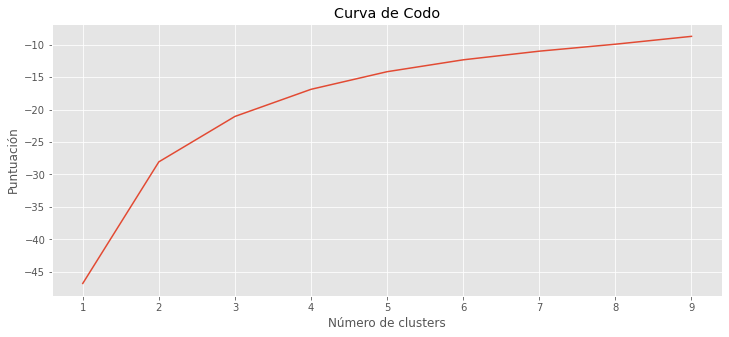

In [286]:
# Dataset normalizado para correrlo en la curva de codo.
X6 = semillas6_norm
# Curva de Codo
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X6).score(X6) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de clusters')
plt.ylabel('Puntuación')
plt.title('Curva de Codo')
plt.show()

k=2

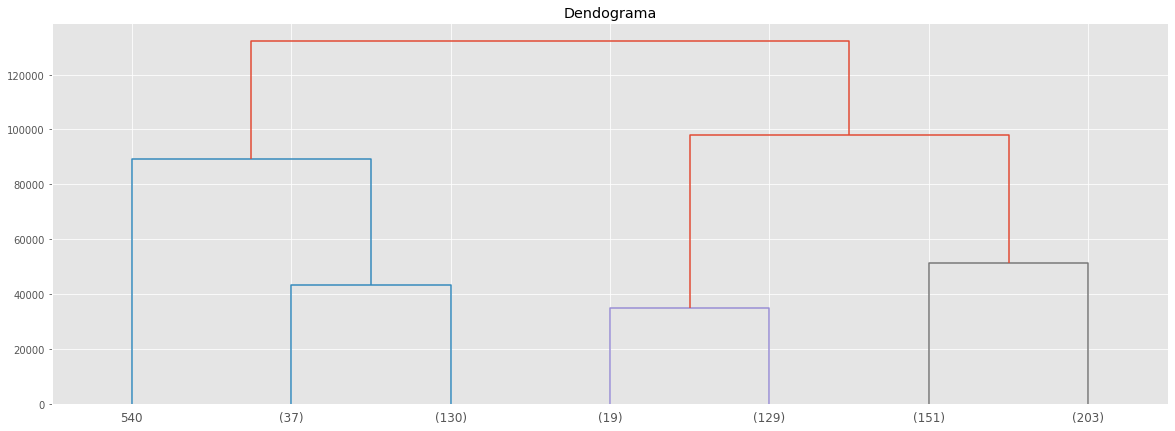

In [287]:
semillas6_dendro=semillas_6_d
plt.figure(figsize=(20,7))
plt.title('Dendograma')
dend=sch.dendrogram(sch.linkage(semillas6_dendro,method='ward'),truncate_mode='level',p=2)

In [288]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
ayuda=cluster.fit(semillas6_norm)
labels_2D=ayuda.labels_

In [289]:
semillas6_ndd6=semillas6_ndd
semillas6_ndd6=semillas6_ndd6.dropna()

In [290]:
model=AgglomerativeClustering(n_clusters=2, linkage='ward')

data_fit_3=model.fit(semillas6_norm)
lab_3c=data_fit_3.labels_

In [291]:
semillas6_ndd6['Labels_3Clusters']=lab_3c
semillas6_ndd6.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,TUITFTE,ADM_RATE_ALL,NPT4_PUB,Labels_3Clusters
count,670.000000,670.000000,670.000000,670.000000
mean,6755.289552,0.676840,13001.528358,0.413433
std,4374.553357,0.177501,4275.718912,0.492817
min,151.000000,0.136400,-445.000000,0.000000
25%,4485.250000,0.565250,10339.250000,0.000000
50%,6074.000000,0.680050,13259.000000,0.000000
75%,8225.250000,0.819875,15861.000000,1.000000
max,74228.000000,1.000000,27032.000000,1.000000


In [292]:
#Grupo 0
print("GRUPO 0:")
is_G=semillas6_ndd6.loc[:, 'Labels_3Clusters']==0
C3_G=semillas6_ndd6[is_G]
df_06 = pd.DataFrame(C3_G)
df_06

GRUPO 0:


,INSTNM,TUITFTE,ADM_RATE_ALL,NPT4_PUB,Labels_3Clusters
4,Alabama State University,7813.0,0.5125,11936.0,0
5,The University of Alabama,12198.0,0.5655,20916.0,0
34,Marion Military Institute,2443.0,0.6034,11013.0,0
85,University of Arizona,12051.0,0.7692,13617.0,0
133,University of Arkansas at Little Rock,6265.0,0.5274,10087.0,0
...,...,...,...,...,...
7185,Pennsylvania State University-World Campus,6355.0,0.6488,18165.0,0
7255,Ukiah Adult School,1953.0,0.6102,12777.0,0
7322,Georgia Regents University,8867.0,0.4103,2898.0,0
7323,Middle Georgia State College,2744.0,0.4486,9049.0,0


In [294]:
df_06.describe()

,TUITFTE,ADM_RATE_ALL,NPT4_PUB,Labels_3Clusters
count,393.000000,393.000000,393.000000,393.0
mean,7173.564885,0.561360,13539.330789,0.0
std,5126.575011,0.126984,4310.406295,0.0
min,499.000000,0.136400,1887.000000,0.0
25%,4480.000000,0.477400,11053.000000,0.0
50%,6277.000000,0.586700,13858.000000,0.0
75%,8775.000000,0.648800,16133.000000,0.0
max,74228.000000,0.775500,27032.000000,0.0


In [293]:
#Grupo 1
print("GRUPO 1:")
is_G=semillas6_ndd6.loc[:, 'Labels_3Clusters']==1
C3_G=semillas6_ndd6[is_G]
df_16 = pd.DataFrame(C3_G)
df_16

GRUPO 1:


,INSTNM,TUITFTE,ADM_RATE_ALL,NPT4_PUB,Labels_3Clusters
0,Alabama A & M University,9063.0,0.8989,13415.0,1
1,University of Alabama at Birmingham,9033.0,0.8673,14805.0,1
3,University of Alabama in Huntsville,8322.0,0.8062,17520.0,1
8,Auburn University at Montgomery,7625.0,0.8371,11915.0,1
9,Auburn University,13186.0,0.8274,17541.0,1
...,...,...,...,...,...
5779,University of California-Merced,8846.0,0.7551,11921.0,1
6031,Arizona State University-Downtown Phoenix,11815.0,0.7626,12403.0,1
6268,Escuela De Troqueleria Y Herramentaje,973.0,0.8605,328.0,1
7242,Carthage R9 School District-Carthage Technical...,3295.0,0.7143,10875.0,1


In [295]:
df_16.describe()

,TUITFTE,ADM_RATE_ALL,NPT4_PUB,Labels_3Clusters
count,277.000000,277.00000,277.000000,277.0
mean,6161.851986,0.84068,12238.509025,1.0
std,2907.824126,0.08682,4114.469217,0.0
min,151.000000,0.64580,-445.000000,1.0
25%,4509.000000,0.77980,9865.000000,1.0
50%,5871.000000,0.83110,11927.000000,1.0
75%,7691.000000,0.89410,14928.000000,1.0
max,16762.000000,1.00000,23861.000000,1.0


Caso 7: NPT4_PRIV, PREDDEG, DISTANCEONLY

In [296]:
semillas7_ndd=semilla_original.drop(columns=['NPT4_PUB','TUITFTE','ADM_RATE_ALL'])
semillas_7_nd=semilla_original.drop(columns=['NPT4_PUB','TUITFTE','ADM_RATE_ALL','INSTNM'])
semillas_7_d=semillas_7_nd.dropna()
semillas7_norm=(semillas_7_d-semillas_7_d.min())/(semillas_7_d.max()-semillas_7_d.min())

In [297]:
semillas7_norm

,DISTANCEONLY,NPT4_PRIV,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Graduate degree,PREDDEG_ Non-degree-granting
2,0.0,0.097702,0.0,1.0,0.0,NaN,0.0
10,0.0,0.272711,0.0,1.0,0.0,NaN,0.0
12,0.0,0.156617,0.0,1.0,0.0,NaN,0.0
13,0.0,0.274490,1.0,0.0,0.0,NaN,0.0
16,0.0,0.212637,0.0,1.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...
7368,0.0,0.212715,0.0,1.0,0.0,NaN,0.0
7369,0.0,0.248755,0.0,1.0,0.0,NaN,0.0
7374,0.0,0.243282,0.0,0.0,0.0,NaN,1.0
7375,0.0,0.188388,0.0,0.0,0.0,NaN,1.0


In [298]:
semillas7_norm=semillas7_norm.drop(columns=['PREDDEG_ Graduate degree'])


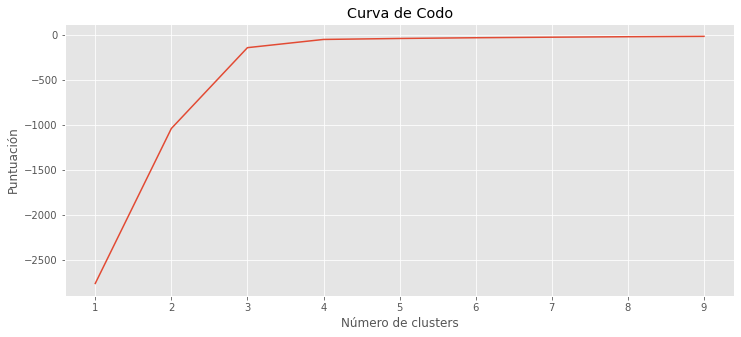

In [299]:
# Dataset normalizado para correrlo en la curva de codo.
X7 = semillas7_norm
# Curva de Codo
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X7).score(X7) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de clusters')
plt.ylabel('Puntuación')
plt.title('Curva de Codo')
plt.show()

K=3

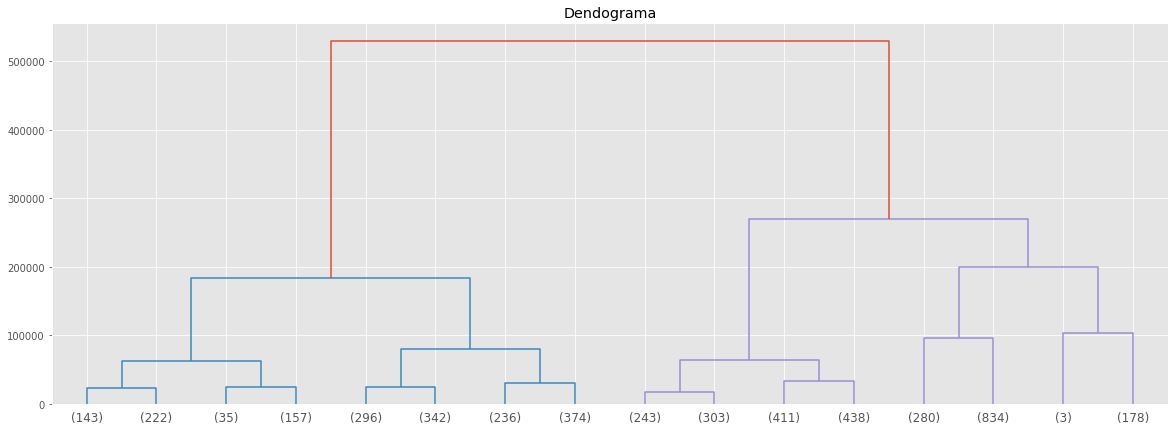

In [300]:
semillas7_dendro=semillas_7_d.drop(columns=['PREDDEG_ Graduate degree'])
plt.figure(figsize=(20,7))
plt.title('Dendograma')
dend=sch.dendrogram(sch.linkage(semillas7_dendro,method='ward'),truncate_mode='level',p=3)


In [301]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
ayuda=cluster.fit(semillas7_norm)
labels_2D=ayuda.labels_

In [302]:
semillas7_ndd7=semillas7_ndd.drop(columns=['PREDDEG_ Graduate degree'])
semillas7_ndd7=semillas7_ndd7.dropna()

In [303]:
model=AgglomerativeClustering(n_clusters=3, linkage='ward')

data_fit_3=model.fit(semillas7_norm)
lab_3c=data_fit_3.labels_

In [304]:
semillas7_ndd7['Labels_3Clusters']=lab_3c
semillas7_ndd7.describe()

,DISTANCEONLY,NPT4_PRIV,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
count,4495.000000,4495.000000,4495.000000,4495.000000,4495.000000,4495.000000,4495.000000
mean,0.004672,18026.023137,0.151279,0.312570,0.525250,0.010901,1.150389
std,0.068199,7275.321449,0.358361,0.463592,0.499418,0.103849,0.672483
min,0.000000,-1220.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13083.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,18197.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,0.000000,22417.500000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.000000,87570.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [308]:
#Grupo 0
print("GRUPO 0:")
is_G=semillas7_ndd7.loc[:, 'Labels_3Clusters']==0
C3_G=semillas7_ndd7[is_G]
df_07 = pd.DataFrame(C3_G)
df_07

GRUPO 0:


,INSTNM,DISTANCEONLY,NPT4_PRIV,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
13,South University-Montgomery,0.0,23152.0,1,0,0,0,0
43,Prince Institute-Southeast,0.0,20904.0,1,0,0,0,0
79,College America-Flagstaff,0.0,20877.0,1,0,0,0,0
89,Brown Mackie College-Tucson,0.0,19957.0,1,0,0,0,0
106,ITT Technical Institute-Tucson,0.0,22313.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
7340,National American University-Wichita West,0.0,11221.0,0,0,0,1,0
7341,National American University-Indianapolis,0.0,13351.0,1,0,0,0,0
7374,Brown Mackie College-Dallas,0.0,20381.0,0,0,0,1,0
7375,American Institute-Toms River,0.0,15507.0,0,0,0,1,0


In [311]:
df_07.describe()

,DISTANCEONLY,NPT4_PRIV,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
count,729.00000,729.000000,729.000000,729.0,729.0,729.000000,729.0
mean,0.00823,20140.331962,0.932785,0.0,0.0,0.067215,0.0
std,0.09041,5690.843077,0.250567,0.0,0.0,0.250567,0.0
min,0.00000,2963.000000,0.000000,0.0,0.0,0.000000,0.0
25%,0.00000,17195.000000,1.000000,0.0,0.0,0.000000,0.0
50%,0.00000,20713.000000,1.000000,0.0,0.0,0.000000,0.0
75%,0.00000,23380.000000,1.000000,0.0,0.0,0.000000,0.0
max,1.00000,42858.000000,1.000000,0.0,0.0,1.000000,0.0


In [309]:
#Grupo 1
print("GRUPO 1:")
is_G=semillas7_ndd7.loc[:, 'Labels_3Clusters']==1
C3_G=semillas7_ndd7[is_G]
df_17 = pd.DataFrame(C3_G)
df_17

GRUPO 1:


,INSTNM,DISTANCEONLY,NPT4_PRIV,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
18,New Beginning College of Cosmetology,0.0,9476.0,0,0,1,0,1
22,Herzing University-Birmingham,0.0,22518.0,0,0,1,0,1
61,Alaska Bible College,0.0,9592.0,0,0,1,0,1
66,Charter College-Anchorage,0.0,17691.0,0,0,1,0,1
68,Alaska Career College,0.0,14170.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
7298,Tulsa Welding School-Tulsa,0.0,16473.0,0,0,1,0,1
7304,San Joaquin Valley College-Lancaster,0.0,19290.0,0,0,1,0,1
7308,American Career College-Long Beach,0.0,20248.0,0,0,1,0,1
7313,Utah College of Massage Therapy-Houston,0.0,18668.0,0,0,1,0,1


In [310]:
#Grupo 2
print("GRUPO 2:")
is_G=semillas7_ndd7.loc[:, 'Labels_3Clusters']==2
C3_G=semillas7_ndd7[is_G]
df_27 = pd.DataFrame(C3_G)
df_27

GRUPO 2:


,INSTNM,DISTANCEONLY,NPT4_PRIV,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
2,Amridge University,0.0,7455.0,0,1,0,0,2
10,Birmingham Southern College,0.0,22994.0,0,1,0,0,2
12,Concordia College Alabama,0.0,12686.0,0,1,0,0,2
16,Faulkner University,0.0,17660.0,0,1,0,0,2
23,Huntingdon College,0.0,17864.0,0,1,0,0,2
...,...,...,...,...,...,...,...,...
7364,DeVry University-Tennessee,0.0,15127.0,0,1,0,0,2
7365,DeVry University-Texas,0.0,19920.0,0,1,0,0,2
7367,DeVry University-Virginia,0.0,19151.0,0,1,0,0,2
7368,DeVry University-Washington,0.0,17667.0,0,1,0,0,2


In [313]:
df_27.describe()

,DISTANCEONLY,NPT4_PRIV,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
count,1405.000000,1405.000000,1405.0,1405.0,1405.0,1405.0,1405.0
mean,0.007829,21028.069039,0.0,1.0,0.0,0.0,2.0
std,0.088167,7179.471991,0.0,0.0,0.0,0.0,0.0
min,0.000000,1172.000000,0.0,1.0,0.0,0.0,2.0
25%,0.000000,17188.000000,0.0,1.0,0.0,0.0,2.0
50%,0.000000,20439.000000,0.0,1.0,0.0,0.0,2.0
75%,0.000000,25340.000000,0.0,1.0,0.0,0.0,2.0
max,1.000000,47611.000000,0.0,1.0,0.0,0.0,2.0


Caso 8: NPT4_PRIV, PREDDEG, TUITFTE

In [315]:
semillas8_ndd=semilla_original.drop(columns=['NPT4_PUB','DISTANCEONLY','ADM_RATE_ALL'])
semillas_8_nd=semilla_original.drop(columns=['NPT4_PUB','DISTANCEONLY','ADM_RATE_ALL','INSTNM'])
semillas_8_d=semillas_8_nd.dropna()
semillas8_norm=(semillas_8_d-semillas_8_d.min())/(semillas_8_d.max()-semillas_8_d.min())

In [316]:
semillas8_norm

,TUITFTE,NPT4_PRIV,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Graduate degree,PREDDEG_ Non-degree-granting
2,0.077466,0.097702,0.0,1.0,0.0,NaN,0.0
10,0.076637,0.272711,0.0,1.0,0.0,NaN,0.0
12,0.038698,0.156617,0.0,1.0,0.0,NaN,0.0
13,0.094614,0.274490,1.0,0.0,0.0,NaN,0.0
16,0.070655,0.212637,0.0,1.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...
7365,0.116112,0.238090,0.0,1.0,0.0,NaN,0.0
7367,0.112000,0.229429,0.0,1.0,0.0,NaN,0.0
7368,0.101932,0.212715,0.0,1.0,0.0,NaN,0.0
7369,0.102144,0.248755,0.0,1.0,0.0,NaN,0.0


In [317]:
semillas8_norm=semillas8_norm.drop(columns=['PREDDEG_ Graduate degree'])


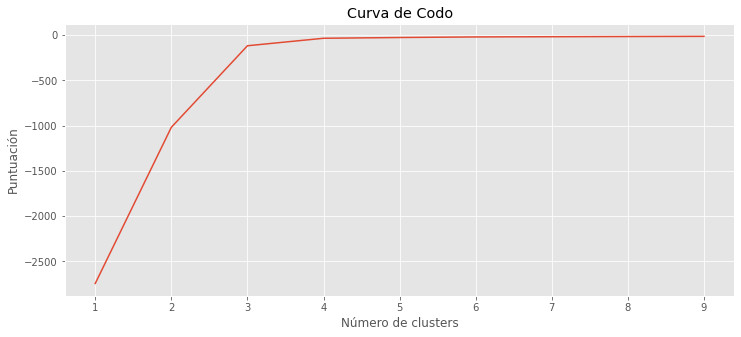

In [318]:
# Dataset normalizado para correrlo en la curva de codo.
X8 = semillas8_norm
# Curva de Codo
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X8).score(X8) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de clusters')
plt.ylabel('Puntuación')
plt.title('Curva de Codo')
plt.show()

K=3

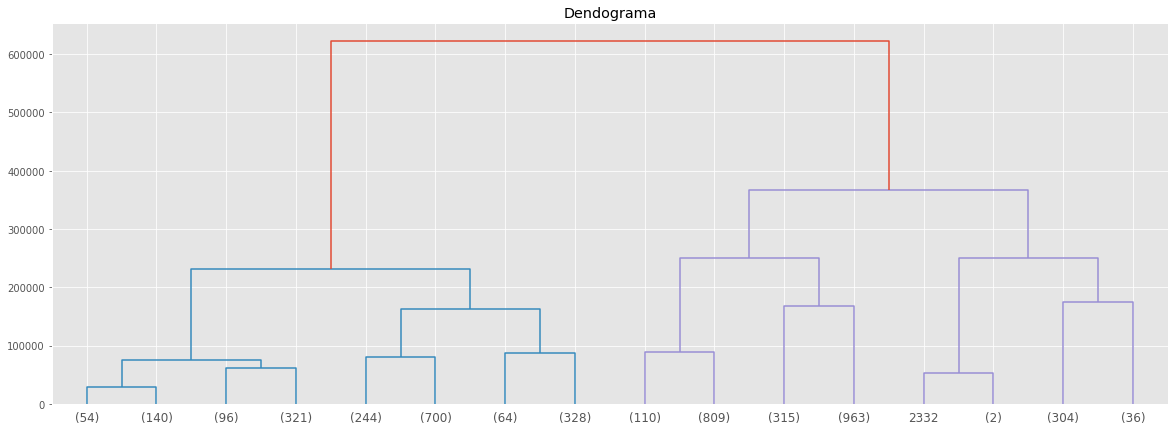

In [319]:
semillas8_dendro=semillas_8_d.drop(columns=['PREDDEG_ Graduate degree'])
plt.figure(figsize=(20,7))
plt.title('Dendograma')
dend=sch.dendrogram(sch.linkage(semillas8_dendro,method='ward'),truncate_mode='level',p=3)

In [320]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
ayuda=cluster.fit(semillas8_norm)
labels_2D=ayuda.labels_

In [321]:
semillas8_ndd8=semillas8_ndd.drop(columns=['PREDDEG_ Graduate degree'])
semillas8_ndd8=semillas8_ndd8.dropna()


In [322]:
model=AgglomerativeClustering(n_clusters=3, linkage='ward')

data_fit_3=model.fit(semillas8_norm)
lab_3c=data_fit_3.labels_


In [323]:
semillas8_ndd8['Labels_3Clusters']=lab_3c
semillas8_ndd8.describe()

,TUITFTE,NPT4_PRIV,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
count,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000
mean,11743.856474,18023.550925,0.151549,0.313127,0.525518,0.009806,1.151772
std,7382.538511,7277.303464,0.358623,0.463817,0.499404,0.098550,0.671973
min,0.000000,-1220.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7179.500000,13081.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,10596.000000,18192.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,15102.500000,22409.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,155643.000000,87570.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [326]:
#Grupo 0
print("GRUPO 0:")
is_G=semillas8_ndd8.loc[:, 'Labels_3Clusters']==0
C3_G=semillas8_ndd8[is_G]
df_08 = pd.DataFrame(C3_G)
df_08


GRUPO 0:


,INSTNM,TUITFTE,NPT4_PRIV,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
13,South University-Montgomery,14726.0,23152.0,1,0,0,0,0
43,Prince Institute-Southeast,10722.0,20904.0,1,0,0,0,0
79,College America-Flagstaff,14468.0,20877.0,1,0,0,0,0
89,Brown Mackie College-Tucson,10282.0,19957.0,1,0,0,0,0
106,ITT Technical Institute-Tucson,21110.0,22313.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
7336,National American University-Georgetown,10954.0,19795.0,1,0,0,0,0
7338,National American University-Rochester,12208.0,15611.0,0,0,0,1,0
7340,National American University-Wichita West,13439.0,11221.0,0,0,0,1,0
7341,National American University-Indianapolis,12686.0,13351.0,1,0,0,0,0


In [328]:
df_08.describe()

,TUITFTE,NPT4_PRIV,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
count,724.000000,724.000000,724.000000,724.0,724.0,724.000000,724.0
mean,14035.679558,20146.725138,0.939227,0.0,0.0,0.060773,0.0
std,6505.886788,5682.110205,0.239080,0.0,0.0,0.239080,0.0
min,41.000000,2963.000000,0.000000,0.0,0.0,0.000000,0.0
25%,9407.750000,17228.750000,1.000000,0.0,0.0,0.000000,0.0
50%,13493.000000,20731.000000,1.000000,0.0,0.0,0.000000,0.0
75%,18724.500000,23378.500000,1.000000,0.0,0.0,0.000000,0.0
max,56785.000000,42858.000000,1.000000,0.0,0.0,1.000000,0.0


In [325]:
#Grupo 1
print("GRUPO 1:")
is_G=semillas8_ndd8.loc[:, 'Labels_3Clusters']==1
C3_G=semillas8_ndd8[is_G]
df_18 = pd.DataFrame(C3_G)
df_18


GRUPO 1:


,INSTNM,TUITFTE,NPT4_PRIV,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
18,New Beginning College of Cosmetology,1624.0,9476.0,0,0,1,0,1
22,Herzing University-Birmingham,8048.0,22518.0,0,0,1,0,1
61,Alaska Bible College,5777.0,9592.0,0,0,1,0,1
66,Charter College-Anchorage,20340.0,17691.0,0,0,1,0,1
68,Alaska Career College,6193.0,14170.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
7297,MedTech Institute-Orlando Campus,23166.0,11963.0,0,0,1,0,1
7298,Tulsa Welding School-Tulsa,16266.0,16473.0,0,0,1,0,1
7304,San Joaquin Valley College-Lancaster,6980.0,19290.0,0,0,1,0,1
7313,Utah College of Massage Therapy-Houston,2076.0,18668.0,0,0,1,0,1


In [329]:
df_18.describe()

,TUITFTE,NPT4_PRIV,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
count,2358.000000,2358.000000,2358.0,2358.0,2358.0,2358.0,2358.0
mean,9183.315098,15581.427905,0.0,0.0,1.0,0.0,1.0
std,7197.057690,6888.804396,0.0,0.0,0.0,0.0,0.0
min,0.000000,-1220.000000,0.0,0.0,1.0,0.0,1.0
25%,5612.000000,11113.250000,0.0,0.0,1.0,0.0,1.0
50%,8512.500000,14955.000000,0.0,0.0,1.0,0.0,1.0
75%,11140.000000,19895.750000,0.0,0.0,1.0,0.0,1.0
max,155643.000000,87570.000000,0.0,0.0,1.0,0.0,1.0


In [327]:
#Grupo 2
print("GRUPO 2:")
is_G=semillas8_ndd8.loc[:, 'Labels_3Clusters']==2
C3_G=semillas8_ndd8[is_G]
df_28 = pd.DataFrame(C3_G)
df_28

GRUPO 2:


,INSTNM,TUITFTE,NPT4_PRIV,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
2,Amridge University,12057.0,7455.0,0,1,0,0,2
10,Birmingham Southern College,11928.0,22994.0,0,1,0,0,2
12,Concordia College Alabama,6023.0,12686.0,0,1,0,0,2
16,Faulkner University,10997.0,17660.0,0,1,0,0,2
23,Huntingdon College,9074.0,17864.0,0,1,0,0,2
...,...,...,...,...,...,...,...,...
7364,DeVry University-Tennessee,16107.0,15127.0,0,1,0,0,2
7365,DeVry University-Texas,18072.0,19920.0,0,1,0,0,2
7367,DeVry University-Virginia,17432.0,19151.0,0,1,0,0,2
7368,DeVry University-Washington,15865.0,17667.0,0,1,0,0,2


In [330]:
df_28.describe()

,TUITFTE,NPT4_PRIV,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
count,1405.000000,1405.000000,1405.0,1405.0,1405.0,1405.0,1405.0
mean,14860.209964,21028.069039,0.0,1.0,0.0,0.0,2.0
std,6476.930742,7179.471991,0.0,0.0,0.0,0.0,0.0
min,0.000000,1172.000000,0.0,1.0,0.0,0.0,2.0
25%,10786.000000,17188.000000,0.0,1.0,0.0,0.0,2.0
50%,14139.000000,20439.000000,0.0,1.0,0.0,0.0,2.0
75%,18025.000000,25340.000000,0.0,1.0,0.0,0.0,2.0
max,48657.000000,47611.000000,0.0,1.0,0.0,0.0,2.0


Caso 9: NPT4_PRIV, PREDDEG, ADM_RATE_ALL

In [331]:
semillas9_ndd=semilla_original.drop(columns=['NPT4_PUB','DISTANCEONLY','TUITFTE'])
semillas_9_nd=semilla_original.drop(columns=['NPT4_PUB','DISTANCEONLY','TUITFTE','INSTNM'])
semillas_9_d=semillas_9_nd.dropna()
semillas9_norm=(semillas_9_d-semillas_9_d.min())/(semillas_9_d.max()-semillas_9_d.min())

In [332]:
semillas9_norm

,ADM_RATE_ALL,NPT4_PRIV,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Graduate degree,PREDDEG_ Non-degree-granting
10,0.6422,0.311030,0.0,1.0,0.0,NaN,0.0
13,0.4829,0.313239,1.0,0.0,0.0,NaN,0.0
22,0.7490,0.304374,0.0,0.0,1.0,NaN,0.0
23,0.6279,0.239296,0.0,1.0,0.0,NaN,0.0
30,0.7388,0.230612,0.0,1.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...
7364,0.7648,0.201024,0.0,1.0,0.0,NaN,0.0
7365,0.7648,0.268045,0.0,1.0,0.0,NaN,0.0
7367,0.7648,0.257292,0.0,1.0,0.0,NaN,0.0
7368,0.7648,0.236541,0.0,1.0,0.0,NaN,0.0


In [333]:
semillas9_norm=semillas9_norm.drop(columns=['PREDDEG_ Graduate degree'])


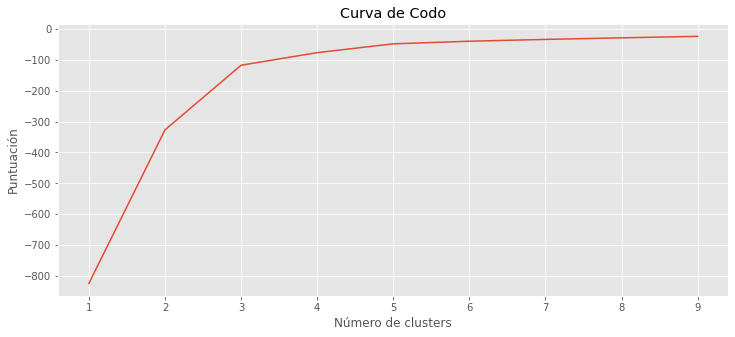

In [334]:
# Dataset normalizado para correrlo en la curva de codo.
X9 = semillas9_norm
# Curva de Codo
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X9).score(X9) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de clusters')
plt.ylabel('Puntuación')
plt.title('Curva de Codo')
plt.show()

K=3

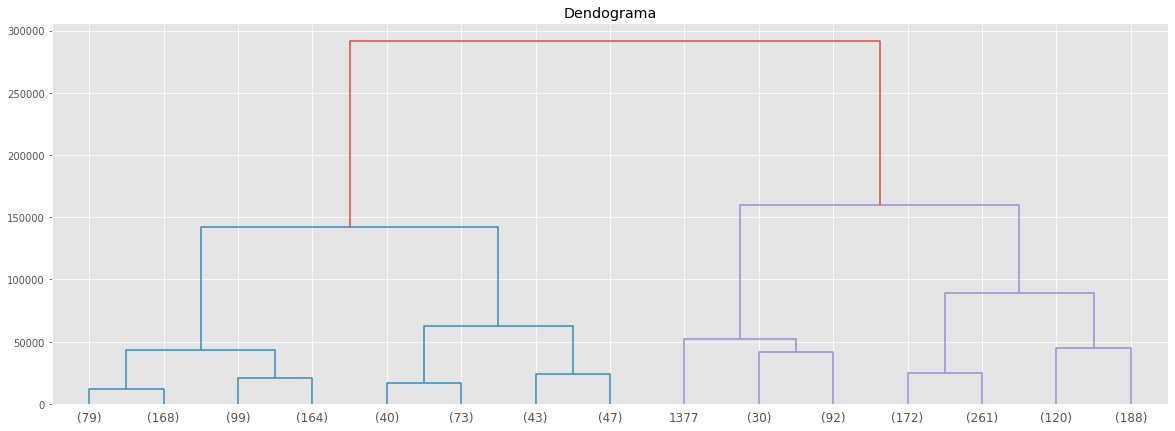

In [335]:
semillas9_dendro=semillas_9_d.drop(columns=['PREDDEG_ Graduate degree'])
plt.figure(figsize=(20,7))
plt.title('Dendograma')
dend=sch.dendrogram(sch.linkage(semillas9_dendro,method='ward'),truncate_mode='level',p=3)


In [336]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
ayuda=cluster.fit(semillas9_norm)
labels_2D=ayuda.labels_

In [337]:
semillas9_ndd9=semillas9_ndd.drop(columns=['PREDDEG_ Graduate degree'])
semillas9_ndd9=semillas9_ndd9.dropna()

In [338]:
model=AgglomerativeClustering(n_clusters=3, linkage='ward')

data_fit_3=model.fit(semillas9_norm)
lab_3c=data_fit_3.labels_

In [339]:
semillas9_ndd9['Labels_3Clusters']=lab_3c
semillas9_ndd9.describe()


,ADM_RATE_ALL,NPT4_PRIV,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
count,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000
mean,0.686787,21421.455929,0.172479,0.698795,0.114141,0.014585,1.043754
std,0.211099,7013.984700,0.377916,0.458927,0.318083,0.119921,0.547248
min,0.000000,751.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.550900,17667.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.717300,21453.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.838800,24893.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,72265.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [343]:
#Grupo 0
print("GRUPO 0:")
is_G=semillas9_ndd9.loc[:, 'Labels_3Clusters']==0
C3_G=semillas9_ndd9[is_G]
df_09 = pd.DataFrame(C3_G)
df_09

GRUPO 0:


,INSTNM,ADM_RATE_ALL,NPT4_PRIV,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
22,Herzing University-Birmingham,0.7490,22518.0,0,0,1,0,0
76,Carrington College-Phoenix,1.0000,20501.0,0,0,1,0,0
77,Carrington College-Mesa,1.0000,22169.0,0,0,1,0,0
78,Carrington College-Tucson,1.0000,21229.0,0,0,1,0,0
149,Baptist Health Schools-Little Rock,0.8615,15238.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
7233,Gemini School of Visual Arts & Communication,1.0000,32858.0,0,0,1,0,0
7250,Shepherds College,0.7059,5078.0,0,0,1,0,0
7265,Lawrence & Company College of Cosmetology,1.0000,5127.0,0,0,0,1,0
7274,California Career Institute,0.7895,18152.0,0,0,1,0,0


In [344]:
df_09.describe()

,ADM_RATE_ALL,NPT4_PRIV,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
count,203.000000,203.000000,203.0,203.0,203.000000,203.000000,203.0
mean,0.823890,19666.064039,0.0,0.0,0.886700,0.113300,0.0
std,0.211215,8010.414356,0.0,0.0,0.317743,0.317743,0.0
min,0.000000,751.000000,0.0,0.0,0.000000,0.000000,0.0
25%,0.750000,15852.500000,0.0,0.0,1.000000,0.000000,0.0
50%,0.857100,20043.000000,0.0,0.0,1.000000,0.000000,0.0
75%,1.000000,23023.000000,0.0,0.0,1.000000,0.000000,0.0
max,1.000000,72265.000000,0.0,0.0,1.000000,1.000000,0.0


In [345]:
#Grupo 1
print("GRUPO 1:")
is_G=semillas9_ndd9.loc[:, 'Labels_3Clusters']==1
C3_G=semillas9_ndd9[is_G]
df_19 = pd.DataFrame(C3_G)
df_19

GRUPO 1:


,INSTNM,ADM_RATE_ALL,NPT4_PRIV,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
10,Birmingham Southern College,0.6422,22994.0,0,1,0,0,1
23,Huntingdon College,0.6279,17864.0,0,1,0,0,1
30,Judson College,0.7388,17243.0,0,1,0,0,1
36,University of Mobile,0.7125,17970.0,0,1,0,0,1
41,Oakwood University,0.3435,26954.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...
7364,DeVry University-Tennessee,0.7648,15127.0,0,1,0,0,1
7365,DeVry University-Texas,0.7648,19920.0,0,1,0,0,1
7367,DeVry University-Virginia,0.7648,19151.0,0,1,0,0,1
7368,DeVry University-Washington,0.7648,17667.0,0,1,0,0,1


In [346]:
df_19.describe()

,ADM_RATE_ALL,NPT4_PRIV,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
count,1102.000000,1102.000000,1102.0,1102.0,1102.0,1102.0,1102.0
mean,0.638467,21552.711434,0.0,1.0,0.0,0.0,1.0
std,0.202959,7141.126724,0.0,0.0,0.0,0.0,0.0
min,0.000000,1172.000000,0.0,1.0,0.0,0.0,1.0
25%,0.522300,17473.500000,0.0,1.0,0.0,0.0,1.0
50%,0.659850,21200.000000,0.0,1.0,0.0,0.0,1.0
75%,0.764800,25653.500000,0.0,1.0,0.0,0.0,1.0
max,1.000000,45774.000000,0.0,1.0,0.0,0.0,1.0


In [348]:
#Grupo 2
print("GRUPO 2:")
is_G=semillas9_ndd9.loc[:, 'Labels_3Clusters']==2
C3_G=semillas9_ndd9[is_G]
df_29 = pd.DataFrame(C3_G)
df_29

GRUPO 2:


,INSTNM,ADM_RATE_ALL,NPT4_PRIV,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
13,South University-Montgomery,0.4829,23152.0,1,0,0,0,2
106,ITT Technical Institute-Tucson,0.8388,22313.0,1,0,0,0,2
107,ITT Technical Institute-Tempe,0.8388,22617.0,1,0,0,0,2
199,ITT Technical Institute-Rancho Cordova,0.8388,23022.0,1,0,0,0,2
205,American Academy of Dramatic Arts-Los Angeles,0.2837,41436.0,1,0,0,0,2
...,...,...,...,...,...,...,...,...
7095,Golf Academy of America-Farmers Branch,1.0000,21542.0,1,0,0,0,2
7177,ITT Technical Institute-West Palm Beach,0.8388,22001.0,1,0,0,0,2
7179,ITT Technical Institute-Indianapolis East,0.8388,24751.0,1,0,0,0,2
7195,South University-Cleveland,0.4829,23948.0,1,0,0,0,2


In [349]:
df_29.describe()

,ADM_RATE_ALL,NPT4_PRIV,PREDDEG_ Associate degree,PREDDEG_ Bachelor's degree,PREDDEG_ Certificate degree,PREDDEG_ Non-degree-granting,Labels_3Clusters
count,272.000000,272.000000,272.0,272.0,272.0,272.0,272.0
mean,0.780230,22199.768382,1.0,0.0,0.0,0.0,2.0
std,0.161889,5301.135001,0.0,0.0,0.0,0.0,0.0
min,0.160300,2963.000000,1.0,0.0,0.0,0.0,2.0
25%,0.748850,19972.000000,1.0,0.0,0.0,0.0,2.0
50%,0.838800,22695.500000,1.0,0.0,0.0,0.0,2.0
75%,0.838800,23996.250000,1.0,0.0,0.0,0.0,2.0
max,1.000000,42858.000000,1.0,0.0,0.0,0.0,2.0


Caso 10: NPT4_PRIV, DISTANCEONLY, TUITFTE

In [350]:
semillas10_ndd=semilla_original.drop(columns=['NPT4_PUB','PREDDEG_ Associate degree',"PREDDEG_ Bachelor's degree",'PREDDEG_ Certificate degree','PREDDEG_ Non-degree-granting','PREDDEG_ Graduate degree','ADM_RATE_ALL'])
semillas_10_nd=semilla_original.drop(columns=['NPT4_PUB','PREDDEG_ Associate degree',"PREDDEG_ Bachelor's degree",'PREDDEG_ Certificate degree','PREDDEG_ Non-degree-granting','PREDDEG_ Graduate degree','ADM_RATE_ALL','INSTNM'])
semillas_10_d=semillas_10_nd.dropna()
semillas10_norm=(semillas_10_d-semillas_10_d.min())/(semillas_10_d.max()-semillas_10_d.min())

In [351]:
semillas10_norm

,DISTANCEONLY,TUITFTE,NPT4_PRIV
2,0.0,0.077466,0.097702
10,0.0,0.076637,0.272711
12,0.0,0.038698,0.156617
13,0.0,0.094614,0.274490
16,0.0,0.070655,0.212637
...,...,...,...
7365,0.0,0.116112,0.238090
7367,0.0,0.112000,0.229429
7368,0.0,0.101932,0.212715
7369,0.0,0.102144,0.248755


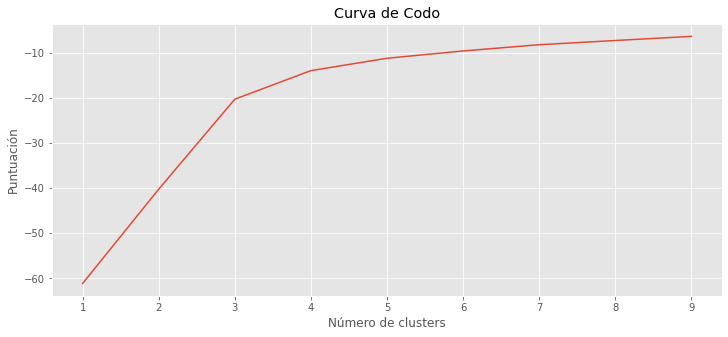

In [352]:
# Dataset normalizado para correrlo en la curva de codo.
X10 = semillas10_norm
# Curva de Codo
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X10).score(X10) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de clusters')
plt.ylabel('Puntuación')
plt.title('Curva de Codo')
plt.show()

K=3

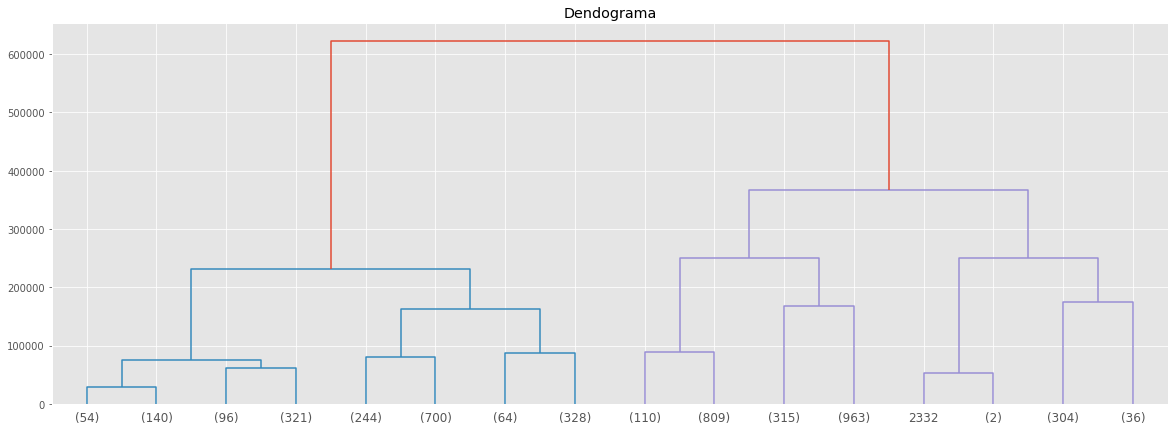

In [353]:
semillas10_dendro=semillas_10_d
plt.figure(figsize=(20,7))
plt.title('Dendograma')
dend=sch.dendrogram(sch.linkage(semillas10_dendro,method='ward'),truncate_mode='level',p=3)


In [354]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
ayuda=cluster.fit(semillas10_norm)
labels_2D=ayuda.labels_

In [355]:
semillas10_ndd10=semillas10_ndd
semillas10_ndd10=semillas10_ndd10.dropna()


In [356]:
model=AgglomerativeClustering(n_clusters=3, linkage='ward')

data_fit_3=model.fit(semillas10_norm)
lab_3c=data_fit_3.labels_


In [357]:
semillas10_ndd10['Labels_3Clusters']=lab_3c
semillas10_ndd10.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DISTANCEONLY,TUITFTE,NPT4_PRIV,Labels_3Clusters
count,4487.000000,4487.000000,4487.000000,4487.000000
mean,0.004680,11743.856474,18023.550925,0.967462
std,0.068259,7382.538511,7277.303464,0.997238
min,0.000000,0.000000,-1220.000000,0.000000
25%,0.000000,7179.500000,13081.000000,0.000000
50%,0.000000,10596.000000,18192.000000,0.000000
75%,0.000000,15102.500000,22409.000000,2.000000
max,1.000000,155643.000000,87570.000000,2.000000


In [359]:
#Grupo 0
print("GRUPO 0:")
is_G=semillas10_ndd10.loc[:, 'Labels_3Clusters']==0
C3_G=semillas10_ndd10[is_G]
df_010 = pd.DataFrame(C3_G)
df_010

GRUPO 0:


,INSTNM,DISTANCEONLY,TUITFTE,NPT4_PRIV,Labels_3Clusters
10,Birmingham Southern College,0.0,11928.0,22994.0,0
13,South University-Montgomery,0.0,14726.0,23152.0,0
22,Herzing University-Birmingham,0.0,8048.0,22518.0,0
36,University of Mobile,0.0,10339.0,17970.0,0
41,Oakwood University,0.0,11909.0,26954.0,0
...,...,...,...,...,...
7363,DeVry University-Pennsylvania,0.0,17370.0,19598.0,0
7365,DeVry University-Texas,0.0,18072.0,19920.0,0
7367,DeVry University-Virginia,0.0,17432.0,19151.0,0
7369,DeVry University-Wisconsin,0.0,15898.0,20867.0,0


In [360]:
df_010.describe()

,DISTANCEONLY,TUITFTE,NPT4_PRIV,Labels_3Clusters
count,2306.0,2306.000000,2306.000000,2306.0
mean,0.0,14854.274501,23449.994796,0.0
std,0.0,7846.181385,5174.972086,0.0
min,0.0,0.000000,8697.000000,0.0
25%,0.0,10191.250000,19954.750000,0.0
50%,0.0,13610.000000,22264.500000,0.0
75%,0.0,18394.750000,25223.250000,0.0
max,0.0,155643.000000,87570.000000,0.0


In [361]:
#Grupo 1
print("GRUPO 1:")
is_G=semillas10_ndd10.loc[:, 'Labels_3Clusters']==1
C3_G=semillas10_ndd10[is_G]
df_110 = pd.DataFrame(C3_G)
df_110

GRUPO 1:


,INSTNM,DISTANCEONLY,TUITFTE,NPT4_PRIV,Labels_3Clusters
1644,New England College of Business and Finance,1.0,9813.0,11406.0,1
4689,Vista College-Online,1.0,9506.0,16131.0,1
5303,Western Governors University,1.0,7638.0,12349.0,1
5616,Grantham University,1.0,5654.0,10744.0,1
5676,American College of Healthcare Sciences,1.0,10797.0,21188.0,1
5708,Colorado Technical University-Online,1.0,13879.0,17256.0,1
5753,Jones International University,1.0,16667.0,15804.0,1
5771,American InterContinental University-Online,1.0,15452.0,17314.0,1
6059,American Public University System,1.0,7090.0,9095.0,1
6177,Trident University International,1.0,7156.0,15107.0,1


In [362]:
df_110.describe()

,DISTANCEONLY,TUITFTE,NPT4_PRIV,Labels_3Clusters
count,21.0,21.000000,21.000000,21.0
mean,1.0,9527.285714,17461.476190,1.0
std,0.0,4289.814496,5581.369389,0.0
min,1.0,1627.000000,9095.000000,1.0
25%,1.0,7090.000000,14652.000000,1.0
50%,1.0,9506.000000,16569.000000,1.0
75%,1.0,11428.000000,19214.000000,1.0
max,1.0,19393.000000,31831.000000,1.0


In [363]:
#Grupo 2
print("GRUPO 2:")
is_G=semillas10_ndd10.loc[:, 'Labels_3Clusters']==2
C3_G=semillas10_ndd10[is_G]
df_210 = pd.DataFrame(C3_G)
df_210

GRUPO 2:


,INSTNM,DISTANCEONLY,TUITFTE,NPT4_PRIV,Labels_3Clusters
2,Amridge University,0.0,12057.0,7455.0,2
12,Concordia College Alabama,0.0,6023.0,12686.0,2
16,Faulkner University,0.0,10997.0,17660.0,2
18,New Beginning College of Cosmetology,0.0,1624.0,9476.0,2
23,Huntingdon College,0.0,9074.0,17864.0,2
...,...,...,...,...,...
7341,National American University-Indianapolis,0.0,12686.0,13351.0,2
7346,DeVry University-California,0.0,17754.0,18003.0,2
7358,DeVry University-New Jersey,0.0,18912.0,15518.0,2
7364,DeVry University-Tennessee,0.0,16107.0,15127.0,2


In [364]:
df_210.describe()

,DISTANCEONLY,TUITFTE,NPT4_PRIV,Labels_3Clusters
count,2160.0,2160.000000,2160.000000,2160.0
mean,0.0,8444.747222,12235.784259,2.0
std,0.0,5106.685593,4023.842103,0.0
min,0.0,0.000000,-1220.000000,2.0
25%,0.0,5165.000000,9474.000000,2.0
50%,0.0,8151.500000,12916.500000,2.0
75%,0.0,10817.250000,15470.000000,2.0
max,0.0,56785.000000,18668.000000,2.0


Caso 11: NPT4_PRIV, DISTANCEONLY, ADM_RATE_ALL

In [365]:
semillas11_ndd=semilla_original.drop(columns=['NPT4_PUB','PREDDEG_ Associate degree',"PREDDEG_ Bachelor's degree",'PREDDEG_ Certificate degree','PREDDEG_ Non-degree-granting','PREDDEG_ Graduate degree','TUITFTE'])
semillas_11_nd=semilla_original.drop(columns=['NPT4_PUB','PREDDEG_ Associate degree',"PREDDEG_ Bachelor's degree",'PREDDEG_ Certificate degree','PREDDEG_ Non-degree-granting','PREDDEG_ Graduate degree','TUITFTE','INSTNM'])
semillas_11_d=semillas_11_nd.dropna()
semillas11_norm=(semillas_11_d-semillas_11_d.min())/(semillas_11_d.max()-semillas_11_d.min())

In [366]:
semillas11_norm

,DISTANCEONLY,ADM_RATE_ALL,NPT4_PRIV
10,0.0,0.6422,0.311030
13,0.0,0.4829,0.313239
22,0.0,0.7490,0.304374
23,0.0,0.6279,0.239296
30,0.0,0.7388,0.230612
...,...,...,...
7364,0.0,0.7648,0.201024
7365,0.0,0.7648,0.268045
7367,0.0,0.7648,0.257292
7368,0.0,0.7648,0.236541


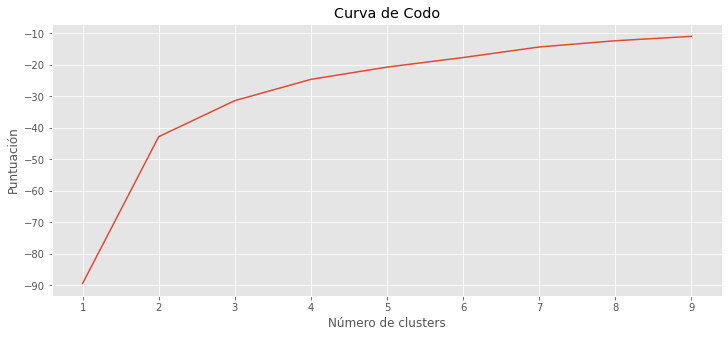

In [367]:
# Dataset normalizado para correrlo en la curva de codo.
X11 = semillas11_norm
# Curva de Codo
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X11).score(X11) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de clusters')
plt.ylabel('Puntuación')
plt.title('Curva de Codo')
plt.show()

K=2

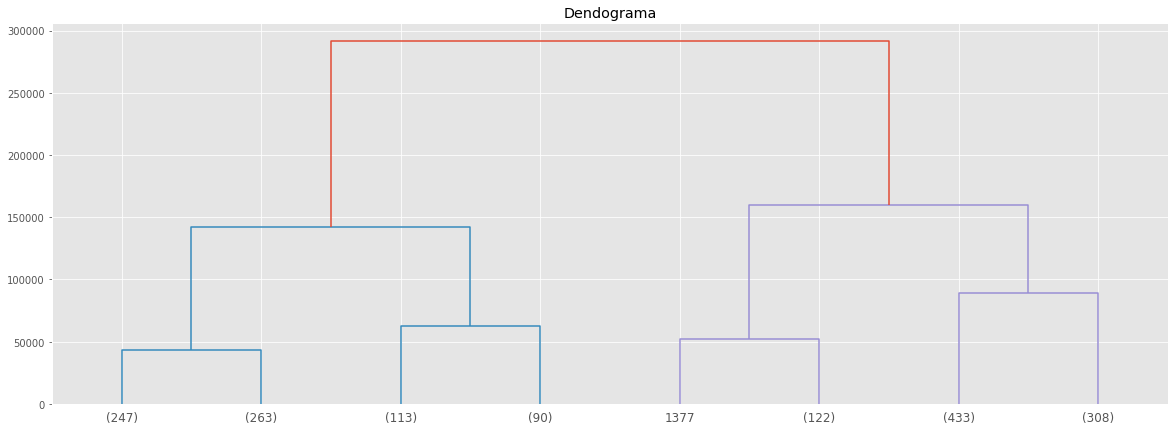

In [368]:
semillas11_dendro=semillas_11_d
plt.figure(figsize=(20,7))
plt.title('Dendograma')
dend=sch.dendrogram(sch.linkage(semillas11_dendro,method='ward'),truncate_mode='level',p=2)


In [369]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
ayuda=cluster.fit(semillas11_norm)
labels_2D=ayuda.labels_


In [370]:
semillas11_ndd11=semillas11_ndd
semillas11_ndd11=semillas11_ndd11.dropna()


In [371]:
model=AgglomerativeClustering(n_clusters=2, linkage='ward')

data_fit_3=model.fit(semillas11_norm)
lab_3c=data_fit_3.labels_

In [372]:
semillas11_ndd11['Labels_3Clusters']=lab_3c
semillas11_ndd11.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DISTANCEONLY,ADM_RATE_ALL,NPT4_PRIV,Labels_3Clusters
count,1577.000000,1577.000000,1577.000000,1577.000000
mean,0.002536,0.686787,21421.455929,0.499683
std,0.050315,0.211099,7013.984700,0.500159
min,0.000000,0.000000,751.000000,0.000000
25%,0.000000,0.550900,17667.000000,0.000000
50%,0.000000,0.717300,21453.000000,0.000000
75%,0.000000,0.838800,24893.000000,1.000000
max,1.000000,1.000000,72265.000000,1.000000


In [374]:
#Grupo 0
print("GRUPO 0:")
is_G=semillas11_ndd11.loc[:, 'Labels_3Clusters']==0
C3_G=semillas11_ndd11[is_G]
df_011 = pd.DataFrame(C3_G)
df_011


GRUPO 0:


,INSTNM,DISTANCEONLY,ADM_RATE_ALL,NPT4_PRIV,Labels_3Clusters
10,Birmingham Southern College,0.0,0.6422,22994.0,0
13,South University-Montgomery,0.0,0.4829,23152.0,0
23,Huntingdon College,0.0,0.6279,17864.0,0
41,Oakwood University,0.0,0.3435,26954.0,0
51,Spring Hill College,0.0,0.4627,18555.0,0
...,...,...,...,...,...
7074,Chamberlain College of Nursing-Indiana,0.0,0.5081,23614.0,0
7153,West Coast University-Dallas,0.0,0.5238,38054.0,0
7194,South University-Austin,0.0,0.4829,24977.0,0
7195,South University-Cleveland,0.0,0.4829,23948.0,0


In [376]:
df_011.describe()

,DISTANCEONLY,ADM_RATE_ALL,NPT4_PRIV,Labels_3Clusters
count,789.0,789.000000,789.000000,789.0
mean,0.0,0.524788,23010.700887,0.0
std,0.0,0.163860,7879.707739,0.0
min,0.0,0.000000,751.000000,0.0
25%,0.0,0.440500,17801.000000,0.0
50%,0.0,0.551200,21929.000000,0.0
75%,0.0,0.643000,28404.000000,0.0
max,0.0,0.896700,72265.000000,0.0


In [375]:
#Grupo 1
print("GRUPO 1:")
is_G=semillas11_ndd11.loc[:, 'Labels_3Clusters']==1
C3_G=semillas11_ndd11[is_G]
df_111 = pd.DataFrame(C3_G)
df_111

GRUPO 1:


,INSTNM,DISTANCEONLY,ADM_RATE_ALL,NPT4_PRIV,Labels_3Clusters
22,Herzing University-Birmingham,0.0,0.7490,22518.0,1
30,Judson College,0.0,0.7388,17243.0,1
36,University of Mobile,0.0,0.7125,17970.0,1
46,Samford University,0.0,0.7697,24093.0,1
52,Southeastern Bible College,0.0,0.9615,12954.0,1
...,...,...,...,...,...
7364,DeVry University-Tennessee,0.0,0.7648,15127.0,1
7365,DeVry University-Texas,0.0,0.7648,19920.0,1
7367,DeVry University-Virginia,0.0,0.7648,19151.0,1
7368,DeVry University-Washington,0.0,0.7648,17667.0,1


In [377]:
df_111.describe()

,DISTANCEONLY,ADM_RATE_ALL,NPT4_PRIV,Labels_3Clusters
count,788.000000,788.000000,788.000000,788.0
mean,0.005076,0.848991,19830.194162,1.0
std,0.071111,0.098491,5592.928254,0.0
min,0.000000,0.482900,1172.000000,1.0
25%,0.000000,0.765400,17464.750000,1.0
50%,0.000000,0.838800,21176.000000,1.0
75%,0.000000,0.937350,23380.250000,1.0
max,1.000000,1.000000,35680.000000,1.0


Caso 12: NPT4_PRIV, TUITFTE, ADM_RATE_ALL

In [378]:
semillas12_ndd=semilla_original.drop(columns=['NPT4_PUB','PREDDEG_ Associate degree',"PREDDEG_ Bachelor's degree",'PREDDEG_ Certificate degree','PREDDEG_ Non-degree-granting','PREDDEG_ Graduate degree','DISTANCEONLY'])
semillas_12_nd=semilla_original.drop(columns=['NPT4_PUB','PREDDEG_ Associate degree',"PREDDEG_ Bachelor's degree",'PREDDEG_ Certificate degree','PREDDEG_ Non-degree-granting','PREDDEG_ Graduate degree','DISTANCEONLY','INSTNM'])
semillas_12_d=semillas_12_nd.dropna()
semillas12_norm=(semillas_12_d-semillas_12_d.min())/(semillas_12_d.max()-semillas_12_d.min())

In [379]:
semillas12_norm

,TUITFTE,ADM_RATE_ALL,NPT4_PRIV
10,0.193570,0.6422,0.311030
13,0.238977,0.4829,0.313239
22,0.130605,0.7490,0.304374
23,0.147255,0.6279,0.239296
30,0.123757,0.7388,0.230612
...,...,...,...
7364,0.261388,0.7648,0.201024
7365,0.293277,0.7648,0.268045
7367,0.282891,0.7648,0.257292
7368,0.257461,0.7648,0.236541


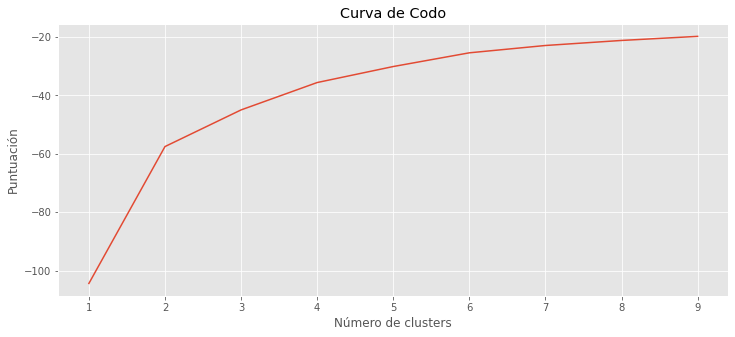

In [381]:
X12 = semillas12_norm
# Curva de Codo
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X12).score(X12) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de clusters')
plt.ylabel('Puntuación')
plt.title('Curva de Codo')
plt.show()

K=2

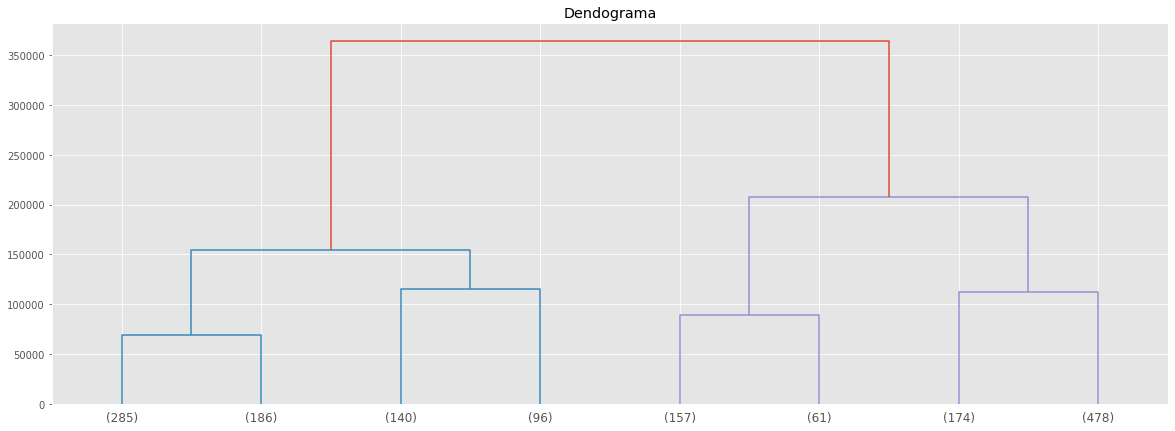

In [382]:
semillas12_dendro=semillas_12_d
plt.figure(figsize=(20,7))
plt.title('Dendograma')
dend=sch.dendrogram(sch.linkage(semillas12_dendro,method='ward'),truncate_mode='level',p=2)


In [383]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
ayuda=cluster.fit(semillas12_norm)
labels_2D=ayuda.labels_

In [384]:
semillas12_ndd12=semillas12_ndd
semillas12_ndd12=semillas12_ndd12.dropna()

In [385]:
model=AgglomerativeClustering(n_clusters=2, linkage='ward')

data_fit_3=model.fit(semillas12_norm)
lab_3c=data_fit_3.labels_

In [386]:
semillas12_ndd12['Labels_3Clusters']=lab_3c
semillas12_ndd12.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,TUITFTE,ADM_RATE_ALL,NPT4_PRIV,Labels_3Clusters
count,1577.000000,1577.000000,1577.000000,1577.000000
mean,15380.639822,0.686787,21421.455929,0.285986
std,6759.162359,0.211099,7013.984700,0.452026
min,0.000000,0.000000,751.000000,0.000000
25%,10778.000000,0.550900,17667.000000,0.000000
50%,14698.000000,0.717300,21453.000000,0.000000
75%,19683.000000,0.838800,24893.000000,1.000000
max,61621.000000,1.000000,72265.000000,1.000000


In [391]:
#Grupo 0
print("GRUPO 0:")
is_G=semillas12_ndd12.loc[:, 'Labels_3Clusters']==0
C3_G=semillas12_ndd12[is_G]
df_012 = pd.DataFrame(C3_G)
df_012

GRUPO 0:


,INSTNM,TUITFTE,ADM_RATE_ALL,NPT4_PRIV,Labels_3Clusters
10,Birmingham Southern College,11928.0,0.6422,22994.0,0
22,Herzing University-Birmingham,8048.0,0.7490,22518.0,0
23,Huntingdon College,9074.0,0.6279,17864.0,0
30,Judson College,7626.0,0.7388,17243.0,0
36,University of Mobile,10339.0,0.7125,17970.0,0
...,...,...,...,...,...
7364,DeVry University-Tennessee,16107.0,0.7648,15127.0,0
7365,DeVry University-Texas,18072.0,0.7648,19920.0,0
7367,DeVry University-Virginia,17432.0,0.7648,19151.0,0
7368,DeVry University-Washington,15865.0,0.7648,17667.0,0


In [392]:
df_012.describe()

,TUITFTE,ADM_RATE_ALL,NPT4_PRIV,Labels_3Clusters
count,1126.000000,1126.000000,1126.000000,1126.0
mean,15286.213144,0.792030,21742.686501,0.0
std,6223.571924,0.125962,6881.891444,0.0
min,0.000000,0.479800,1172.000000,0.0
25%,11017.250000,0.695775,18213.750000,0.0
50%,15001.500000,0.780500,21934.500000,0.0
75%,19423.750000,0.864850,24761.500000,0.0
max,61621.000000,1.000000,72265.000000,0.0


In [393]:
#Grupo 1
print("GRUPO 1:")
is_G=semillas12_ndd12.loc[:, 'Labels_3Clusters']==1
C3_G=semillas12_ndd12[is_G]
df_112 = pd.DataFrame(C3_G)
df_112

GRUPO 1:


,INSTNM,TUITFTE,ADM_RATE_ALL,NPT4_PRIV,Labels_3Clusters
13,South University-Montgomery,14726.0,0.4829,23152.0,1
41,Oakwood University,11909.0,0.3435,26954.0,1
51,Spring Hill College,10653.0,0.4627,18555.0,1
53,Stillman College,10367.0,0.4300,17473.0,1
57,Tuskegee University,14071.0,0.3511,28909.0,1
...,...,...,...,...,...
7030,South University–Savannah Online,7171.0,0.4829,25914.0,1
7073,Chamberlain College of Nursing-Georgia,22264.0,0.5081,19754.0,1
7074,Chamberlain College of Nursing-Indiana,20705.0,0.5081,23614.0,1
7194,South University-Austin,14779.0,0.4829,24977.0,1


In [394]:
df_112.describe()

,TUITFTE,ADM_RATE_ALL,NPT4_PRIV,Labels_3Clusters
count,451.000000,451.000000,451.000000,451.0
mean,15616.392461,0.424029,20619.447894,1.0
std,7943.132758,0.139614,7279.514841,0.0
min,0.000000,0.000000,751.000000,1.0
25%,10076.500000,0.343300,16251.000000,1.0
50%,13823.000000,0.470700,19768.000000,1.0
75%,20906.000000,0.531200,25324.500000,1.0
max,48657.000000,0.617000,43952.000000,1.0
